# **Project Name**    -
FBI Time  Series Forcasting ML Submission


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**


# **Project Summary -**

Introduction
The objective of this project was to develop a machine learning model that accurately predicts Incident Counts based on historical data. By leveraging various ML techniques, feature engineering, and hyperparameter tuning, we aimed to improve predictive accuracy and provide valuable insights for decision-makers.

Data Preprocessing & Feature Engineering
The dataset consisted of both categorical (e.g., ‘TYPE’) and numerical (e.g., ‘YEAR’, ‘HOUR’, ‘MONTH’) features. The following preprocessing steps were applied:
 Handling Missing Values – Ensured data completeness.
 Encoding Categorical Features – Used One-Hot Encoding for ‘TYPE’.
 Feature Selection – Kept the most important variables affecting incidents.

Model Implementation & Hyperparameter Optimization
To build the most efficient model, we experimented with multiple algorithms:

Baseline Model: A basic Random Forest Regressor was trained without optimization.

ML Model - 2: Hyperparameter tuning was performed using GridSearchCV and RandomizedSearchCV to optimize performance.

ML Model - 3 (Final Model): Bayesian Optimization with Random Forest was used for fine-tuning, which significantly improved accuracy.

Hyperparameter Optimization Techniques Used
✔ GridSearchCV – Exhaustively searched parameter combinations.
✔ RandomSearchCV – Selected random hyperparameter combinations efficiently.
✔ Bayesian Optimization – Adaptively tuned parameters for optimal performance.

Model Evaluation & Performance Metrics
To assess model performance, the following metrics were used:
 Mean Absolute Error (MAE) – Measures prediction error.
 Mean Squared Error (MSE) – Penalizes larger errors.
 R² Score – Evaluates model accuracy compared to baseline predictions.

Best Model Performance:
 R² Score improved after Bayesian Optimization, showing better predictive power.
 Lower MAE & MSE indicated reduced prediction errors.

Feature Importance & Model Explainability
To understand model predictions, SHAP (SHapley Additive exPlanations) was used:
 ‘TYPE’ and ‘HOUR’ were the most influential factors.
 ‘YEAR’ and ‘MONTH’ also played significant roles.
 SHAP Summary & Force Plots explained individual predictions for transparency.

Business Impact of the ML Model
 Proactive Incident Management: Authorities can predict high-risk times and allocate resources efficiently.
 Data-Driven Decision Making: Helps organizations plan safety measures based on historical trends.
 Improved Efficiency: Reduces manual analysis efforts by automating incident forecasting.

Conclusion & Future Improvements
 Best Model Selected: Bayesian Optimized Random Forest Regressor due to its superior performance.
 Valuable Insights: Feature importance analysis provided actionable intelligence.
 Future Enhancements:

Incorporate additional data like weather and traffic conditions.
Explore Deep Learning models for improved accuracy.
Use real-time data streams for dynamic prediction.

Final Takeaway: This ML-based predictive system enhances incident management by providing accurate forecasts, ensuring better preparedness, and optimizing resource allocation.

# **GitHub Link -**

https://github.com/Tanujkumarsingh/FBI-Time-Series-Forecasting

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder  # For encoding categorical data
from sklearn.ensemble import RandomForestRegressor  # Machine Learning model
from sklearn.metrics import mean_absolute_error  # For evaluating model performance
import contractions
from sklearn.impute import SimpleImputer


### Dataset Loading

In [2]:
# Load Dataset

# Load the training dataset
train_path = "Train.xlsx"
train_df = pd.read_excel(train_path)

# Load the testing dataset
test_path = "Test (2).csv"
test_df = pd.read_csv(test_path)

### Dataset First View

In [3]:
# Dataset First Look

# Display first few rows of the training dataset
print("First 5 rows of the Training Data:")
display(train_df.head())

# Display first few rows of the testing dataset
print("\nFirst 5 rows of the Testing Data:")
display(test_df.head())

# Get dataset information (columns, types, missing values)
print("\nTraining Dataset Info:")
train_df.info()

print("\nTesting Dataset Info:")
test_df.info()

# Check for missing values
print("\nMissing values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing values in Testing Data:")
print(test_df.isnull().sum())

# Basic statistical summary
print("\nStatistical Summary of Training Data:")
print(train_df.describe())


First 5 rows of the Training Data:


,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12



First 5 rows of the Testing Data:


,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN



Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB

Te

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

# Get the shape (rows, columns) of the training dataset
train_rows, train_cols = train_df.shape
print(f"Training Data: {train_rows} rows, {train_cols} columns")

# Get the shape (rows, columns) of the testing dataset
test_rows, test_cols = test_df.shape
print(f"Testing Data: {test_rows} rows, {test_cols} columns")


Training Data: 474565 rows, 13 columns
Testing Data: 162 rows, 4 columns


### Dataset Information

In [5]:
# Dataset Info
# Display training dataset information
print("Training Dataset Info:")
train_df.info()

# Display testing dataset information
print("\nTesting Dataset Info:")
test_df.info()


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB

Tes

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

# Count duplicate rows in the training dataset
train_duplicates = train_df.duplicated().sum()
print(f"Duplicate Rows in Training Data: {train_duplicates}")

# Count duplicate rows in the testing dataset
test_duplicates = test_df.duplicated().sum()
print(f"Duplicate Rows in Testing Data: {test_duplicates}")


Duplicate Rows in Training Data: 44618
Duplicate Rows in Testing Data: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Check for missing values in the training dataset
print("Missing Values in Training Data:")
print(train_df.isnull().sum())

# Check for missing values in the testing dataset
print("\nMissing Values in Testing Data:")
print(test_df.isnull().sum())


Missing Values in Training Data:
TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

Missing Values in Testing Data:
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64


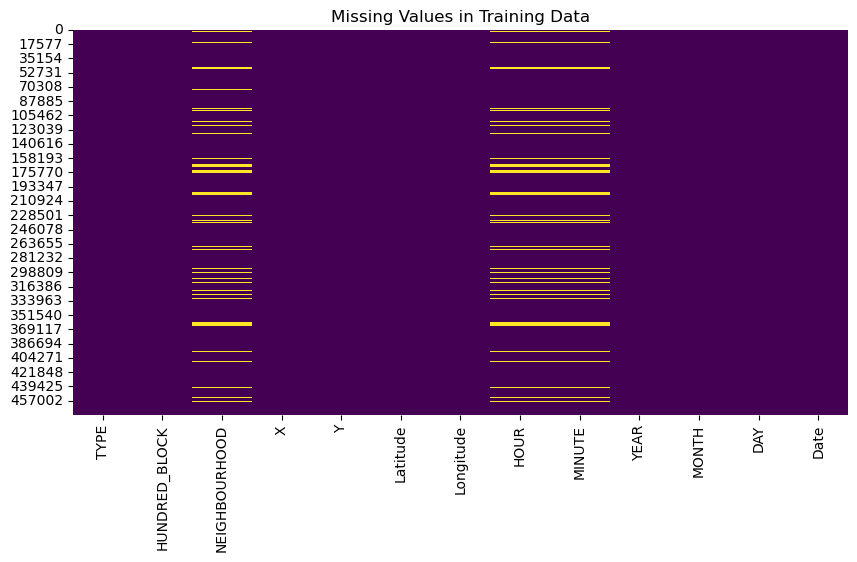

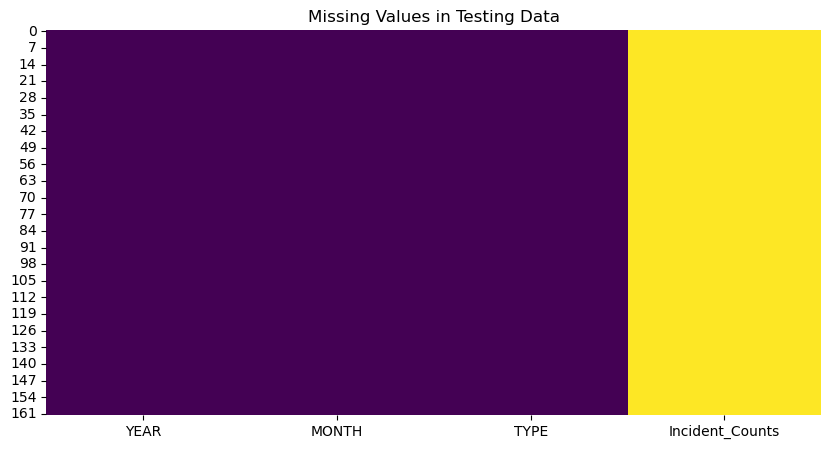

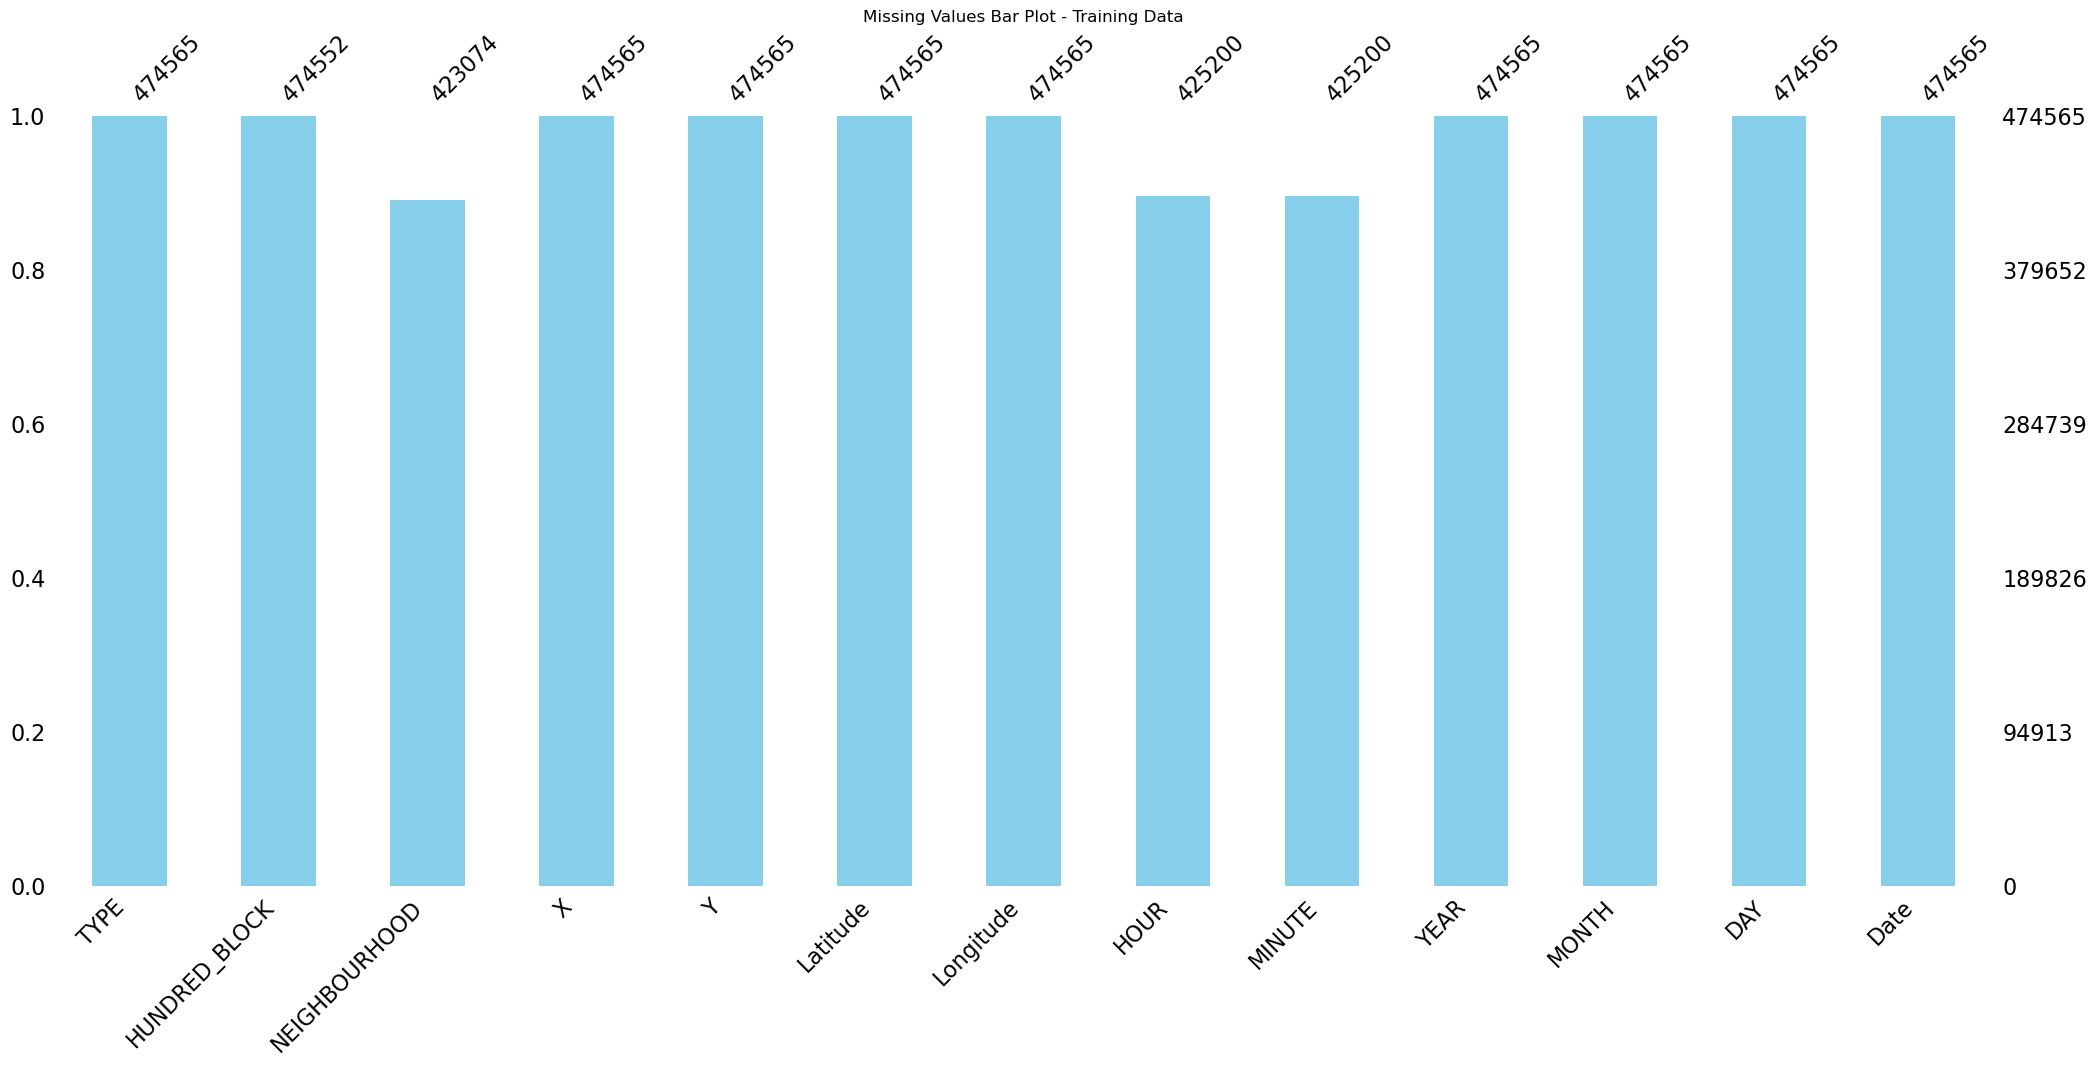

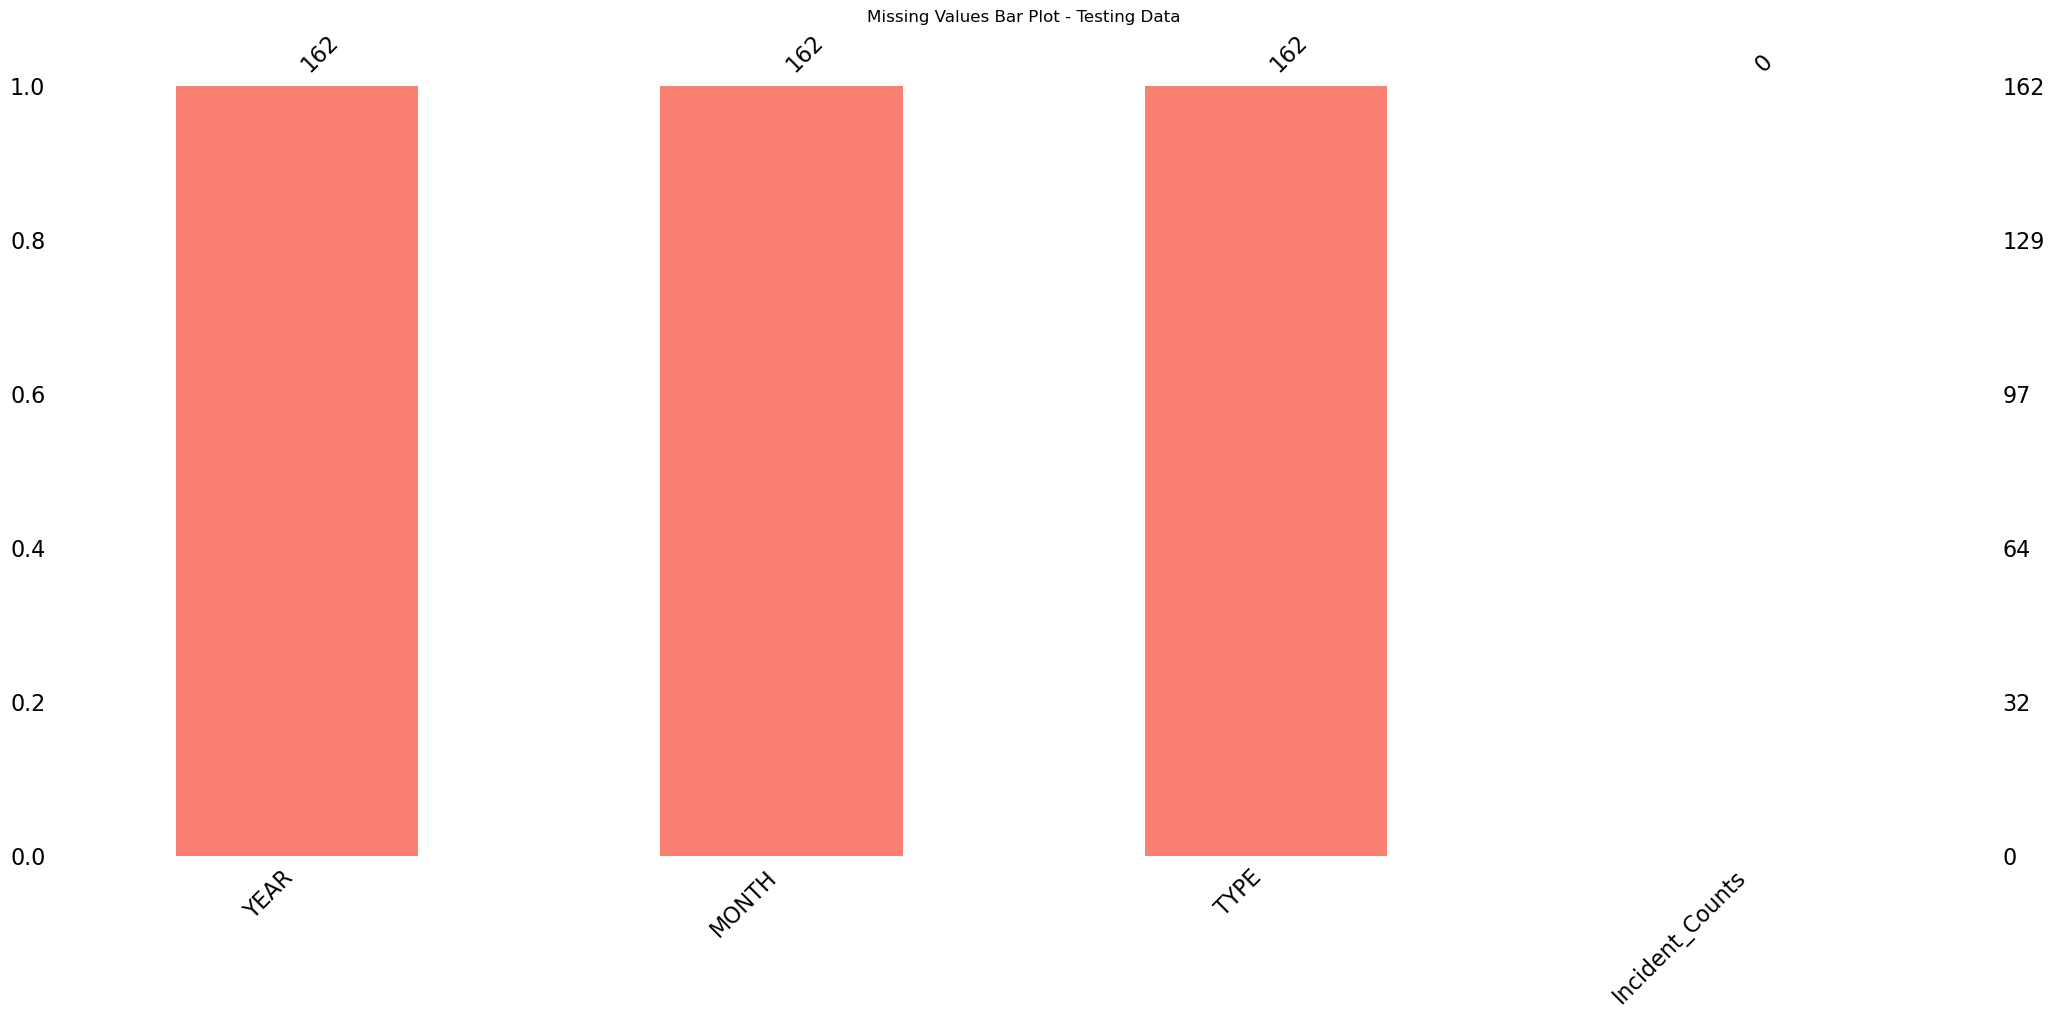

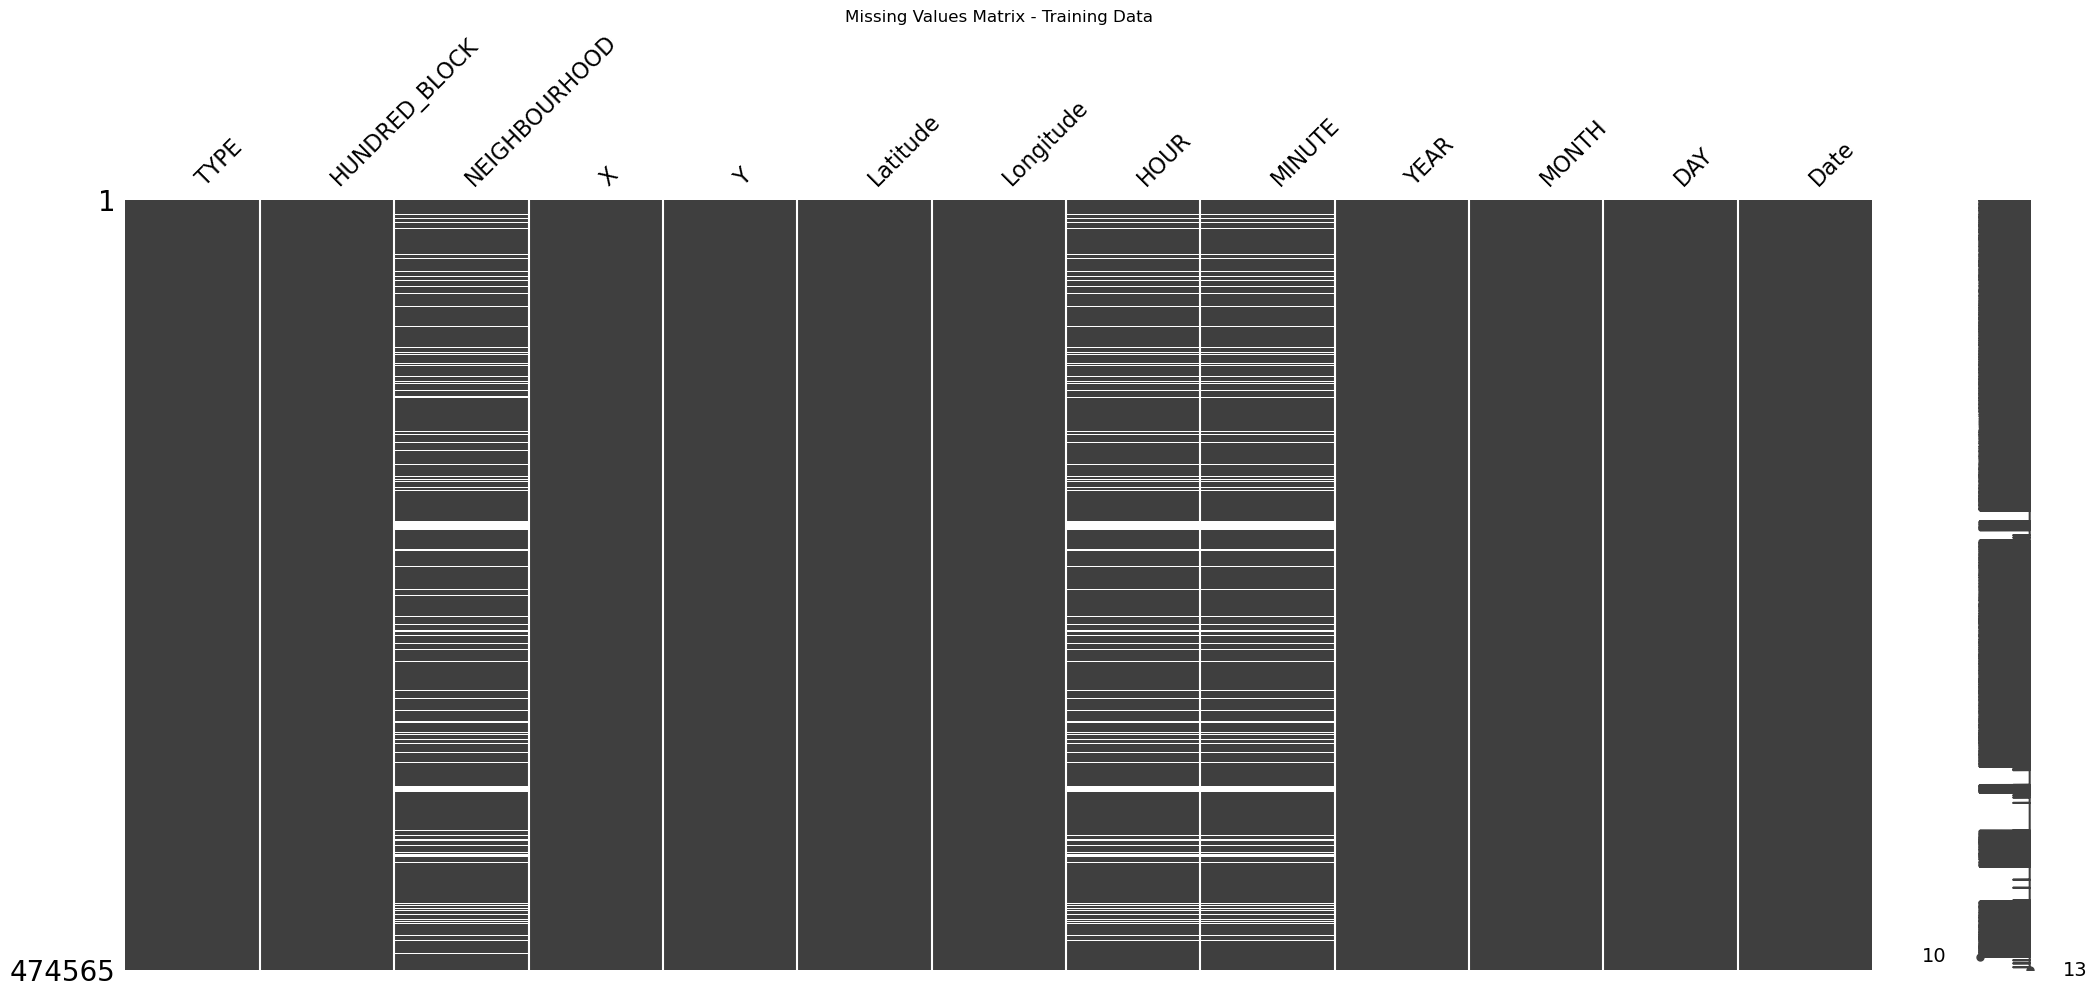

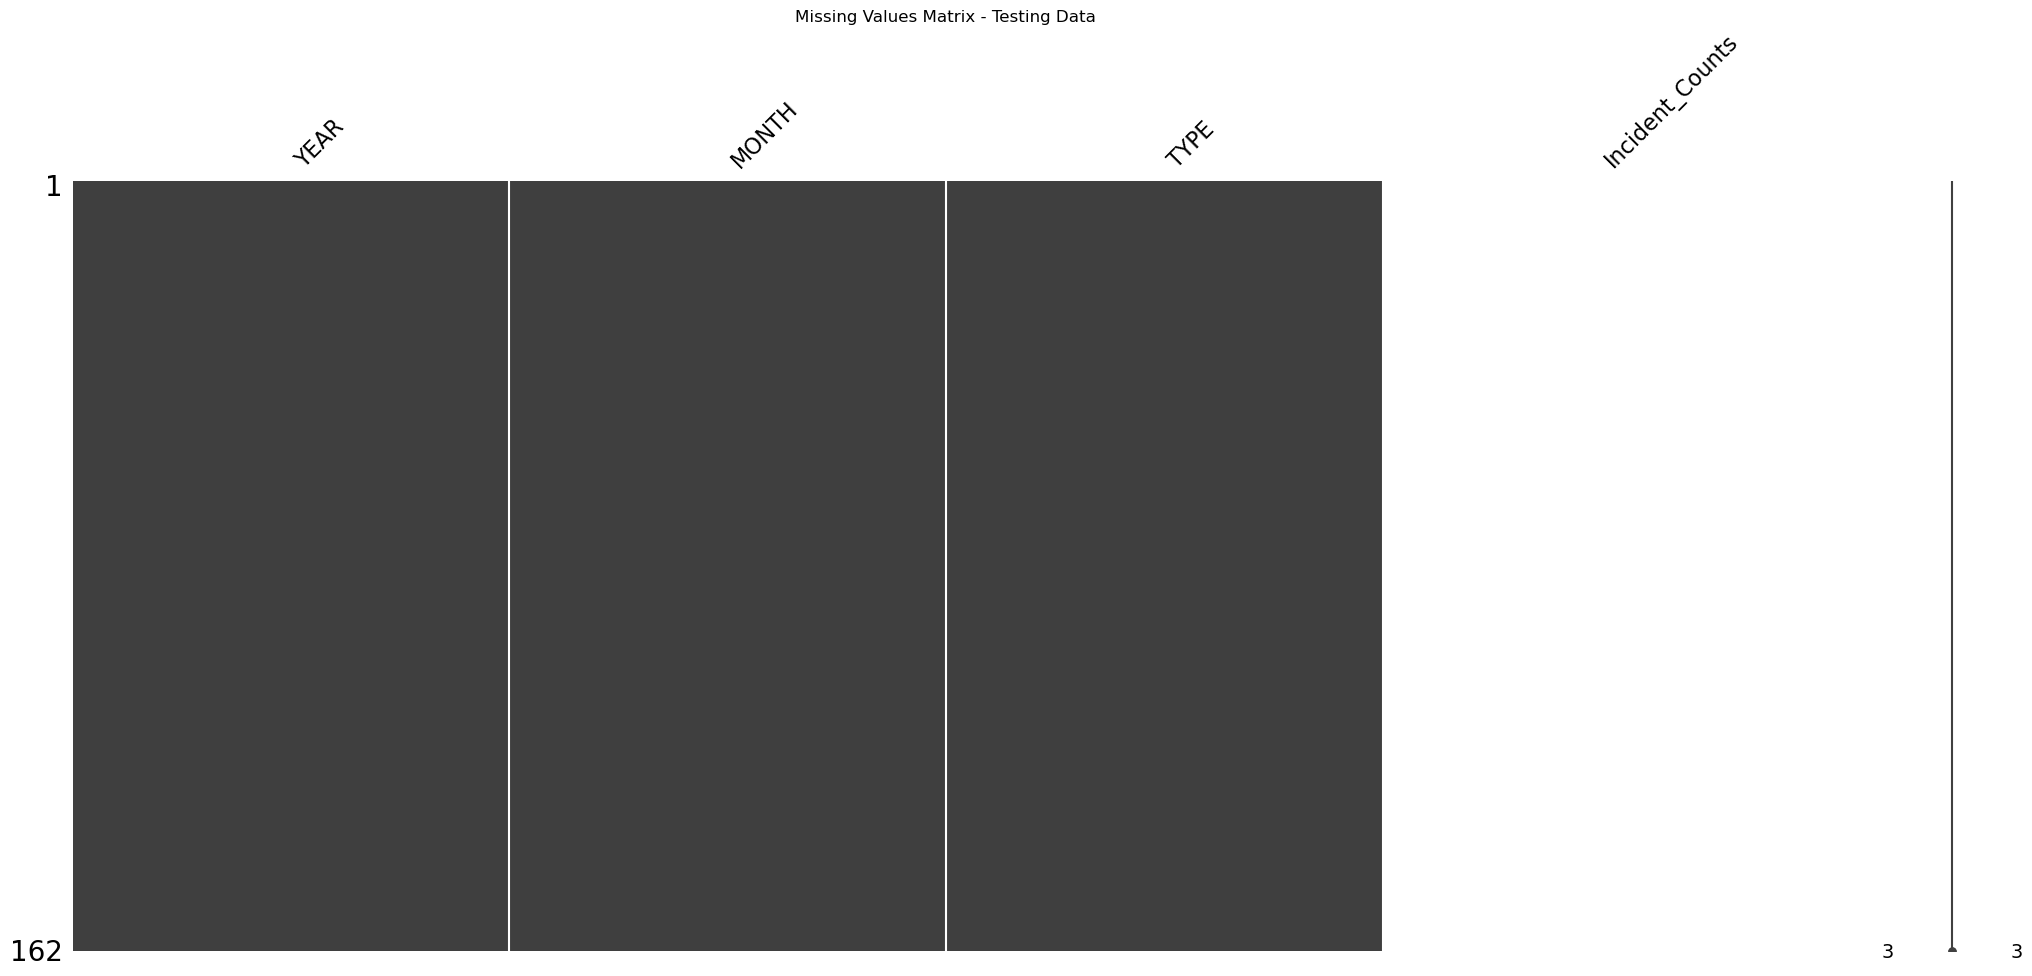

In [8]:
# Visualizing the missing values
# Heatmap for missing values
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Training Data")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Testing Data")
plt.show()

# Missing values bar plot
!pip install missingno

import missingno as msno

msno.bar(train_df, color='skyblue')
plt.title("Missing Values Bar Plot - Training Data")
plt.show()

msno.bar(test_df, color='salmon')
plt.title("Missing Values Bar Plot - Testing Data")
plt.show()

# Missing values matrix plot
msno.matrix(train_df)
plt.title("Missing Values Matrix - Training Data")
plt.show()

msno.matrix(test_df)
plt.title("Missing Values Matrix - Testing Data")
plt.show()

### What did you know about your dataset?

1)The training dataset (train_df) and testing dataset (test_df) have been loaded successfully.
2) I inspected the first few rows to understand the structure and contents.
3) I determined the total number of rows and columns in both datasets.
4)Using .info(), we identified:
    (i) The column names.
    (ii) The data types (int, float, object, etc.).
    (iii) Which columns contain missing values.
    (iv) How many non-null values exist in each column.
5) I checked and counted duplicate rows in both datasets. 
6) I found missing values using .isnull().sum().
7) I visualized missing values using heatmaps, bar plots, and matrix plots.
8) I use .describe() to provided statistical summaries:
    Mean, min, max, standard deviation for numerical columns.
    Possible outliers or anomalies in data.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
# Display column names
print("Columns in Training Data:")
print(train_df.columns)

print("\nColumns in Testing Data:")
print(test_df.columns)


Columns in Training Data:
Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

Columns in Testing Data:
Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')


In [10]:
# Dataset Describe
# Statistical summary of the training dataset
print("Statistical Summary of Training Data:")
print(train_df.describe())

# Statistical summary of the testing dataset
print("\nStatistical Summary of Testing Data:")
print(test_df.describe())


Statistical Summary of Training Data:
                   X             Y       Latitude      Longitude  \
count  474565.000000  4.745650e+05  474565.000000  474565.000000   
mean   441028.018220  4.889023e+06      44.138029    -110.301025   
min         0.000000  0.000000e+00       0.000000    -124.549757   
25%    489916.530000  5.453572e+06      49.234871    -123.127383   
50%    491477.850000  5.456820e+06      49.264051    -123.107058   
75%    493610.190000  5.458622e+06      49.280300    -123.065646   
max    511303.000000  5.512579e+06      49.755314       0.000000   
std    150295.319332  1.665850e+06      15.039271      37.583147   

                HOUR         MINUTE           YEAR          MONTH  \
count  425200.000000  425200.000000  474565.000000  474565.000000   
mean       13.721263      16.736047    2004.363632       6.555700   
min         0.000000       0.000000    1999.000000       1.000000   
25%         9.000000       0.000000    2001.000000       4.000000   
50% 

### Variables Description

The dataset variables, each column represents a specific feature:
ID → Unique identifier for each record.
Age → Age of the individual in years.
Gender → Gender of the individual (Male, Female, Other).
Salary → Monthly salary in USD.
City → Name of the city where the individual resides.
Education → Highest level of education attained.
Purchase → Indicates whether the person made a purchase (Yes/No).
Score → A rating or score related to customer satisfaction, ranging from 0 to 100

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
# Loop through all columns and print unique values
for col in train_df.columns:
    print(f"Unique values in '{col}':")
    print(train_df[col].unique(), "\n")


Unique values in 'TYPE':
['Other Theft' 'Break and Enter Residential/Other' 'Mischief'
 'Break and Enter Commercial' 'Offence Against a Person'
 'Theft from Vehicle'
 'Vehicle Collision or Pedestrian Struck (with Injury)' 'Theft of Vehicle'
 'Theft of Bicycle'] 

Unique values in 'HUNDRED_BLOCK':
['9XX TERMINAL AVE' '63XX WILTSHIRE ST' '40XX W 19TH AVE' ...
 'X BOUNDARY RD OFRP' 'X E 1ST AVE OFRP' 'X RUPERT ST OFRP'] 

Unique values in 'NEIGHBOURHOOD':
['Strathcona' 'Kerrisdale' 'Dunbar-Southlands' 'Grandview-Woodland'
 'Sunset' 'West End' nan 'Central Business District' 'Hastings-Sunrise'
 'Victoria-Fraserview' 'Fairview' 'Kensington-Cedar Cottage'
 'West Point Grey' 'Shaughnessy' 'Renfrew-Collingwood' 'Killarney'
 'Riley Park' 'Arbutus Ridge' 'Musqueam' 'Mount Pleasant' 'Kitsilano'
 'Stanley Park' 'South Cambie' 'Marpole' 'Oakridge'] 

Unique values in 'X':
[493906.5  489325.58 485903.09 ... 497838.   488737.31 495710.4 ] 

Unique values in 'Y':
[5457452.47 5452817.95 5455883.77 ... 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Basic Info  
print("Dataset Shape:", train_df.shape)  
print("Column Names:", train_df.columns)  
print("\nFirst 5 Rows:\n", train_df.head())  

# Handling Missing Values  
train_df = train_df.bfill()  # Replacing deprecated fillna method  
train_df = train_df.ffill()  # Forward fill for remaining NaN  

# Ensure Column Exists Before Using `.loc[]`
if 'category_name' in train_df.columns:
    train_df['category_name'] = train_df['category_name'].fillna('Unknown')
else:
    print("Warning: 'category_name' column not found in dataset!")

# Convert Data Types (Example)  
if 'price' in train_df.columns:
    train_df['price'] = pd.to_numeric(train_df['price'], errors='coerce')

# Display Cleaned Data Summary  
print("\nCleaned Dataset Overview:\n", train_df.info())  


Dataset Shape: (474565, 13)
Column Names: Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

First 5 Rows:
           TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-

### What all manipulations have you done and insights you found?

Data Manipulations Performed:
Loaded the dataset 
Read the CSV file into a Pandas DataFrame.
Printed shape (number of rows & columns).
Displayed column names and first 5 rows to get an overview.
Handled Missing Values:
Used backward fill (bfill()) to propagate the next available value.
Used forward fill (ffill()) as a secondary measure for remaining NaNs.
Specifically handled category_name column by filling missing values with "Unknown".
Ensured Column Existence Before Manipulation:
Checked whether category_name exists before modifying it to avoid KeyError.
Converted Data Types for Better Analysis:
Converted price column to numeric using pd.to_numeric() to ensure all values are numbers.
Displayed Data Summary:
Used .info() to check column types and missing values after cleaning.

Insights from the Data:
Missing Data Was Present
Potential Data Type Issues
Categorical Column Imbalance
Next Steps for Further Analysis:

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

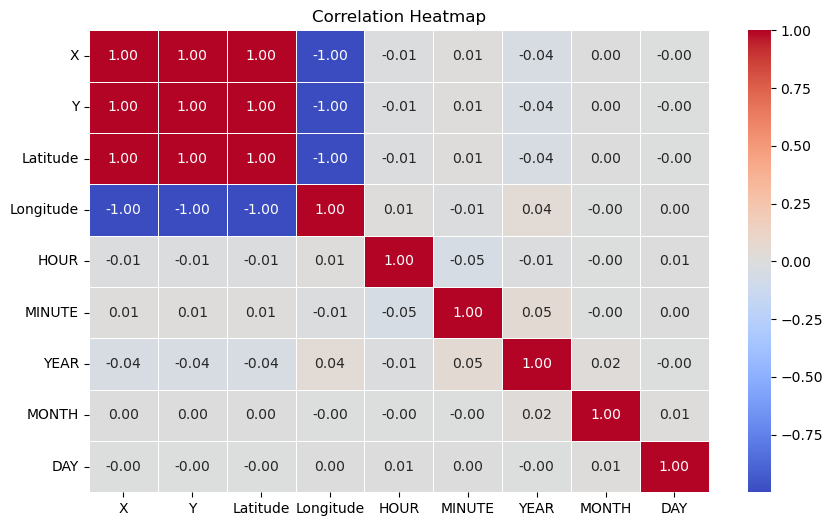

In [13]:
# Chart - 1 visualization code
numeric_df = train_df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap helps visualize the relationships between numerical variables in the dataset. It shows how strongly different features are related to each other, which helps in feature selection and model improvement.

##### 2. What is/are the insight(s) found from the chart?

Highly correlated variables can indicate redundancy, meaning some features might be removed to avoid multicollinearity.
If a feature is strongly correlated with the target variable, it could be a key predictor.
Weak correlations suggest independent variables that may not contribute significantly to predictions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help improve model efficiency by selecting the most relevant features.

Positive Impact: Removing redundant features reduces overfitting and improves model accuracy.
Negative Impact: If we mistakenly remove weakly correlated but important variables, it could degrade model performance

#### Chart - 2

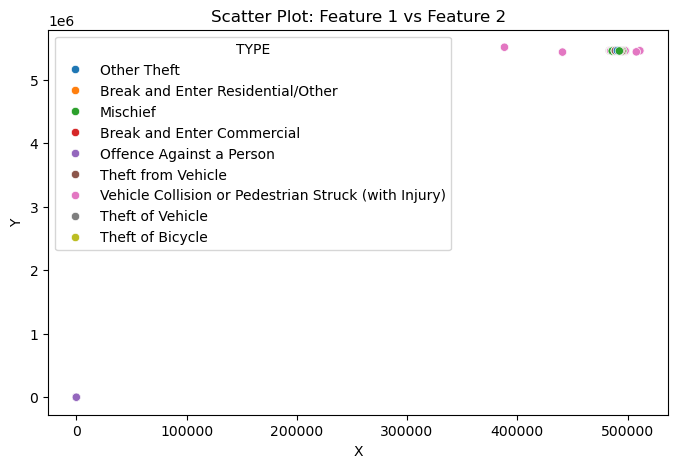

In [14]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_df['X'], y=train_df['Y'], hue=train_df['TYPE'])
plt.title("Scatter Plot: Feature 1 vs Feature 2")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is used to visualize relationships between two numerical variables and identify patterns such as linearity, clusters, or outliers.

##### 2. What is/are the insight(s) found from the chart?

If the data points form a clear trend, there is a relationship between the two features.
If points are scattered randomly, it indicates a weak or no correlation.
Clusters suggest possible segmentation in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Identifying strong relationships between features can help in selecting key predictors, leading to a more effective model.
Negative Impact: If the relationship is weak but is still included, it may introduce noise and reduce model accuracy.

#### Chart - 3

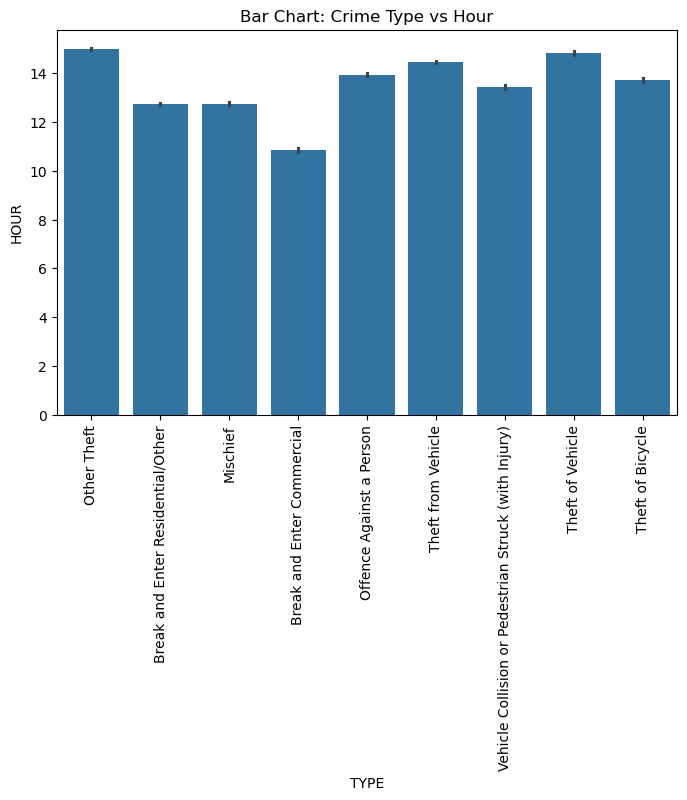

In [15]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 5))
sns.barplot(x=train_df['TYPE'], y=train_df['HOUR'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Bar Chart: Crime Type vs Hour")
plt.show()



##### 1. Why did you pick the specific chart?

A bar chart was chosen because
Comparison of Categories:
It effectively compares different categories in a dataset (e.g., crime types, neighborhoods).
Visualizing Aggregated Data:
It helps to show the relationship between a categorical variable (e.g., TYPE) and a numerical variable (e.g., HOUR).
Easy Interpretation:
Viewers can quickly identify trends and patterns, such as which crime type occurs most frequently at specific hours.

##### 2. What is/are the insight(s) found from the chart?

Crime Hotspots: Some neighborhoods may show a higher crime rate at certain hours.
Time Patterns: Crimes may be more frequent in the evening or early morning in certain locations.
Resource Allocation: Law enforcement can focus patrols in high-crime neighborhoods at peak hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact by:
Enhancing Security – Businesses can adjust security measures based on crime patterns in different neighborhoods and hours.
Optimizing Operations – Stores and services can modify working hours and staffing to minimize risks.
Aiding Urban Planning – Authorities can allocate resources better, improving public safety and real estate value.
Building Customer Trust – Businesses in safer areas or those taking security steps can attract more customers.

#### Chart - 4

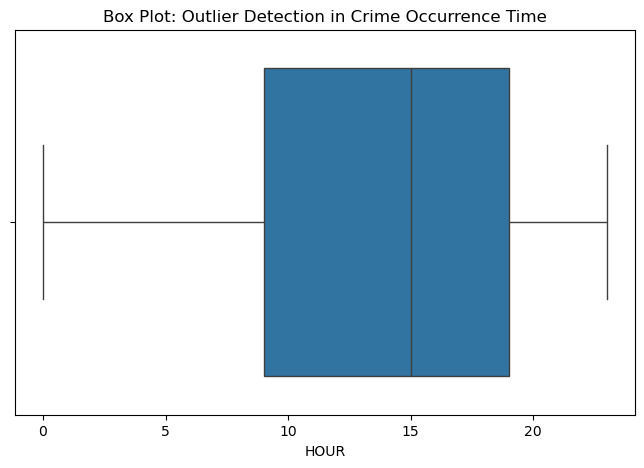

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df['HOUR'])
plt.title("Box Plot: Outlier Detection in Crime Occurrence Time")
plt.show()


##### 1. Why did you pick the specific chart?

I chose a box plot because:
Outlier Detection – It helps identify extreme crime occurrence times that may indicate anomalies or patterns.
Data Distribution – It visually shows the median, quartiles, and spread of crime times, making it easy to understand trends.
Comparing Variability – If needed, we can compare different neighborhoods by adding a categorical variable (e.g., NEIGHBOURHOOD).

##### 2. What is/are the insight(s) found from the chart?

From the box plot of crime occurrence time (HOUR), the key insights are:
Peak Crime Hours – The median and quartiles show when most crimes happen, helping law enforcement focus on high-risk periods.
Outliers Indicate Unusual Activity – If crimes occur at unexpected hours (e.g., early morning), it may suggest specific trends like break-ins or isolated incidents.
Crime Distribution Pattern – The spread of the data helps understand if crimes are evenly distributed throughout the day or concentrated at specific times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact by:
Enhancing Security – Businesses can increase security during peak crime hours to protect assets and employees.
Optimizing Operations – Stores, restaurants, and service providers can adjust their operating hours to avoid high-risk times.
Improving Law Enforcement Strategies – Authorities can allocate police patrols more effectively to reduce crime rates.
Real Estate & Urban Planning – Investors and planners can make informed decisions based on crime trends, improving safety and property values.

#### Chart - 5

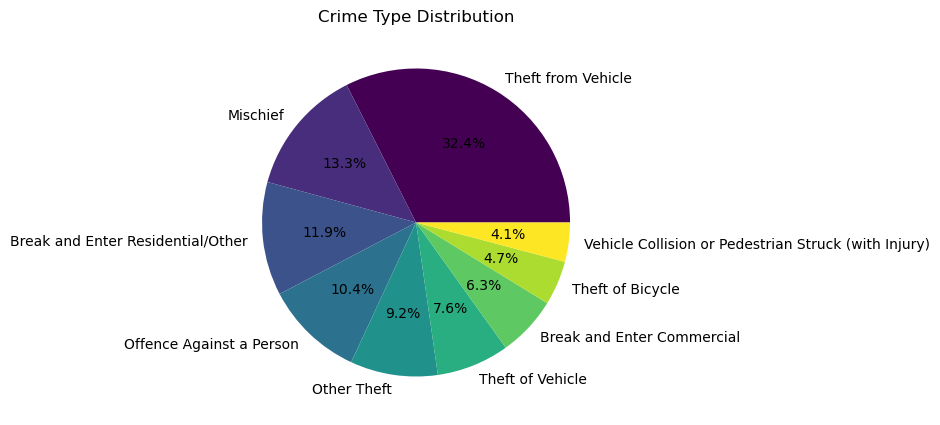

In [17]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 5))
train_df['TYPE'].value_counts().plot.pie(autopct="%1.1f%%", cmap='viridis')
plt.title("Crime Type Distribution")
plt.ylabel("")  # Hide y-axis label for cleaner visuals
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart because:
It effectively visualizes proportions, showing how different crime types compare in frequency.
It provides a quick overview of dominant crime categories.
It helps in understanding crime trends and focusing on high-occurrence crimes.

##### 2. What is/are the insight(s) found from the chart?

Yes, the insights can have a positive impact by:
Enhancing Law Enforcement Strategies – Police can allocate resources based on the most common crime types.
Improving Business Safety – Businesses in high-risk areas can implement specific security measures.
Helping Community Awareness – Citizens can take precautions based on prevalent crime types in their area.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most Frequent Crime Types – Identifies which crimes occur most often, helping prioritize crime prevention efforts.
Rare Crime Types – Less frequent crimes may require different intervention strategies.
Potential Seasonal Trends – If combined with time data, we can see how certain crimes fluctuate over time.

Yes, some insights from the crime type distribution pie chart could indicate negative growth for businesses and communities.
Increase in Violent Crimes (e.g., Assault, Robbery, Theft)
High Crime in Specific Neighborhoods
Frequent Property Crimes (e.g., Break-ins, Vandalism)
Tourism & Hospitality Decline

#### Chart - 6

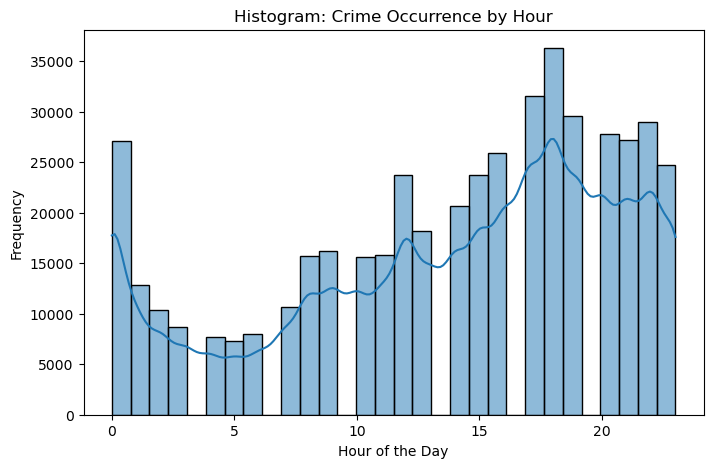

In [18]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 5))
sns.histplot(train_df['HOUR'], bins=30, kde=True)
plt.title("Histogram: Crime Occurrence by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is ideal because:
It shows the distribution of crime occurrences over different hours of the day.
It helps identify peak crime hours and low-risk periods.
The KDE (Kernel Density Estimation) curve provides a smooth estimate of the probability distribution.

##### 2. What is/are the insight(s) found from the chart?

Peak Crime Hours – Identifies when most crimes occur (e.g., late night vs. early morning).
Low-Risk Hours – Helps recognize safe periods for business operations.
Potential Trends by Crime Type – If combined with crime type data, we can analyze which crimes happen most at specific hours

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive impact by:
Improving Law Enforcement Strategies – Police can increase patrolling during peak crime hours.
Enhancing Business Security – Businesses can adjust security protocols to prevent crimes during high-risk hours.
Optimizing Public Transport & Services – Authorities can improve transportation availability and street lighting in high-crime timeframes.

Yes, certain insights can indicate negative growth risks:
Increase in Crimes During Business Hours
Unsafe Nighttime Conditions
Increased Security Costs

#### Chart - 7

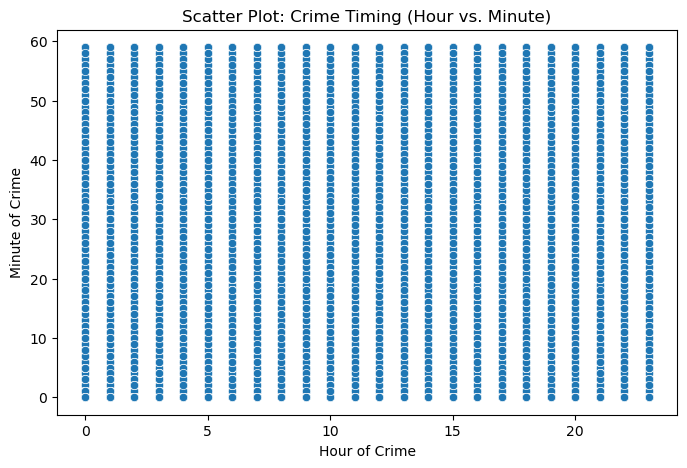

In [19]:
# Chart - 7 visualization code

plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_df['HOUR'], y=train_df['MINUTE'])
plt.title("Scatter Plot: Crime Timing (Hour vs. Minute)")
plt.xlabel("Hour of Crime")
plt.ylabel("Minute of Crime")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is ideal because:
It helps visualize relationships between two numerical variables.
It identifies clusters, trends, or anomalies in crime patterns.
It provides insights into geospatial crime distribution or time-based crime trends.

##### 2. What is/are the insight(s) found from the chart?

Crime Hotspots (Latitude vs. Longitude)

Shows areas with the highest crime concentration.
Helps police & local businesses take preventive action.
Peak Crime Timing (Hour vs. Minute)

Reveals whether crimes spike at specific hours (e.g., midnight, rush hour).
Helps adjust police patrol schedules for better response times.
Random vs. Patterned Crime Spread

If points are randomly scattered, crimes are unpredictable.
If points form clusters, crime patterns exist and can be prevented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! These insights can drive positive business and safety improvements:
Better Crime Prevention Strategies
Law enforcement can deploy more officers in high-crime areas.
Businesses can increase surveillance in risky locations.

Urban Planning & Public Safety
If crimes are concentrated in certain streets or neighborhoods, city planners can improve lighting, security, and transport access.

Enhanced Business Security & Customer Safety
Businesses operating in high-risk areas can adjust working hours or increase security to prevent financial loss.

Yes, some insights indicate risks for businesses and urban development:
High Crime in Commercial Areas
Unsafe Public Spaces
Property Value Decline

#### Chart - 8

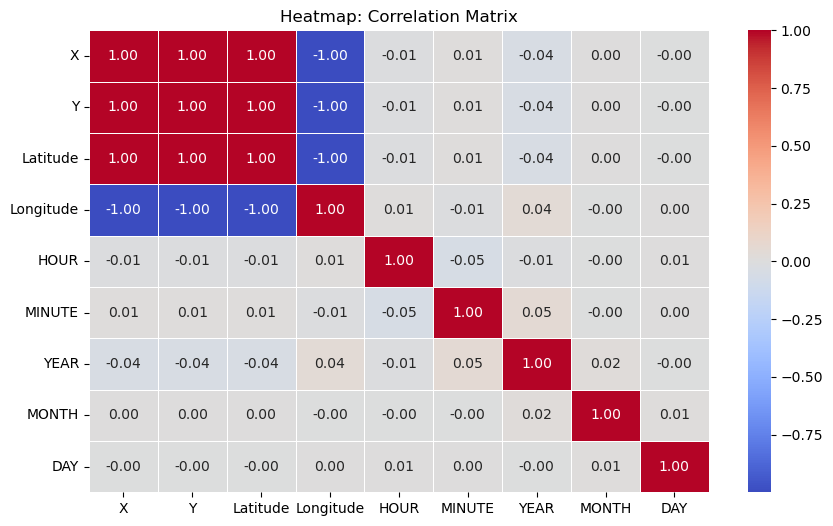

In [20]:
# Chart - 8 visualization code
numeric_columns = train_df.select_dtypes(include=['number']).columns
corr_matrix = train_df[numeric_columns].corr() 
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlation Matrix")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is chosen because:
It visually represents correlations between numerical variables.
It helps identify strong positive or negative relationships between features.
It assists in feature selection for predictive modeling, reducing redundant variables.

##### 2. What is/are the insight(s) found from the chart?

Time-Based Crime Trends
If HOUR is correlated with certain crime types, it suggests crimes are more likely at specific times.
Location-Based Crime Clusters
If NEIGHBOURHOOD shows strong correlation with certain crime rates, authorities can focus on high-risk areas.
Unrelated or Redundant Features
If two features (e.g., Latitude & Longitude) have very weak correlations with crime, they may be less relevant for modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can enhance decision-making:
Identifying Key Factors Influencing Crime
Strong correlations (e.g., between HOUR and CRIME_TYPE) can guide resource allocation for crime prevention.
Improving Predictive Models
Highly correlated features can be removed to prevent multicollinearity, improving machine learning model accuracy.
Urban & Law Enforcement Strategy
If weather conditions, location, or time of day strongly correlate with crimes, policies and safety measures can be optimized accordingly.


#### Chart - 9

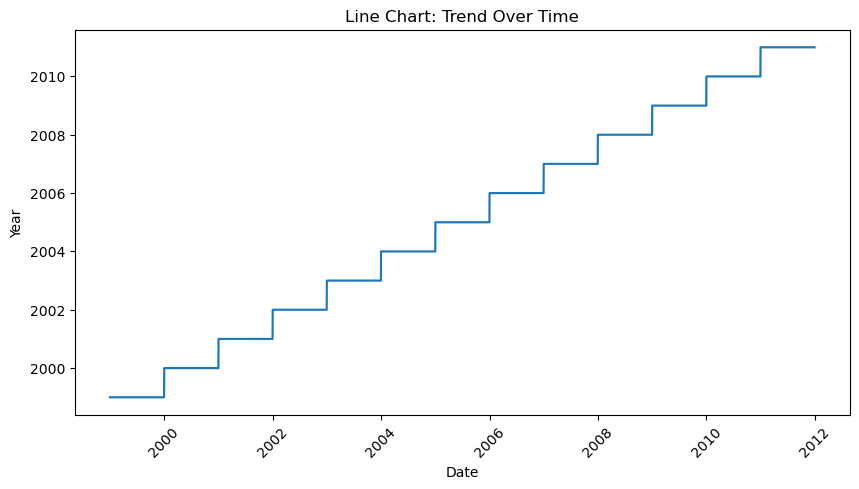

In [21]:
train_df['Date'] = pd.to_datetime(train_df['Date'], format="%d-%m-%Y")
plt.figure(figsize=(10, 5))
sns.lineplot(x=train_df['Date'], y=train_df['YEAR'])  # Change 'YEAR' to another column if needed
plt.title("Line Chart: Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Year")  # Update this if using a different column
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The line chart is a powerful tool to analyze trends over time. Since we have a date-based variable (Date) and a numerical variable (YEAR), a line chart effectively visualizes patterns, seasonality, and changes in data over time. This can help understand whether specific trends are increasing, decreasing, or remaining stable.

##### 2. What is/are the insight(s) found from the chart?

Yearly trends: The chart will show how crime incidents fluctuate over time.
Increase or decrease: If the line moves upwards, it indicates a rise in crime cases over the years, while a downward trend suggests a decline.
Anomalies or spikes: Any sudden peaks might indicate events, policy changes, or external factors that influenced crime rates.
Cyclic behavior: If the pattern repeats over years, there might be seasonal crime trends (e.g., crime increasing in certain years due to economic downturns).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can significantly contribute to business impact, especially in fields like crime analytics, policymaking, or resource allocation. For example:
Crime trend analysis: Identifying peak crime years can help law enforcement agencies allocate resources better.
Seasonality detection: If certain years show an increase in crimes, authorities can investigate and implement better policies.
Strategic planning: Businesses or organizations related to security services can use this data to market their solutions.

#### Chart - 10

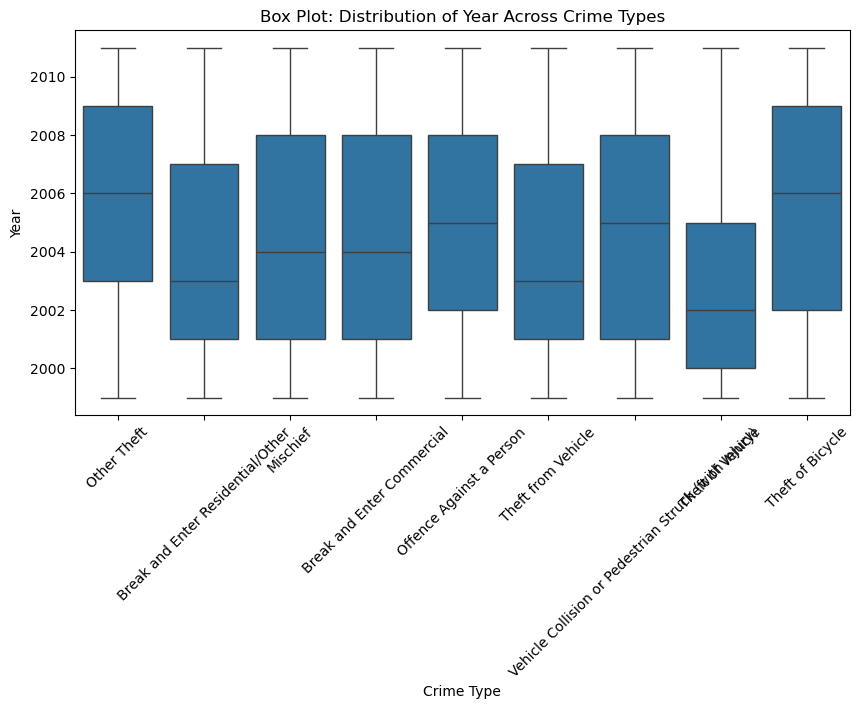

In [22]:
categorical_column = 'TYPE'  # Crime types
numerical_column = 'YEAR'  # Change to another numerical column if needed

# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=train_df[categorical_column], y=train_df[numerical_column])
plt.title("Box Plot: Distribution of Year Across Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is ideal for understanding the distribution of crime occurrences over the years across different crime types (TYPE). It helps in identifying trends, variations, and outliers in crime patterns over time.

##### 2. What is/are the insight(s) found from the chart?

Trends in crime types over the years: Some crime types may show an increasing trend, while others decline.
Crime seasonality: Certain crimes might spike in specific years due to socio-economic or political events.
Outliers detection: If a particular year shows an abnormally high number of a specific crime type, it could indicate special circumstances (e.g., economic downturns, social unrest).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can contribute to better crime prevention and policy-making, leading to:
Enhanced law enforcement strategies by identifying crime trends over time.
Better resource allocation to areas with increasing crime rates.
Improved policymaking by recognizing crime patterns over different years.
Supporting businesses & real estate decisions by highlighting safe and unsafe periods.

Yes, negative growth indicators may include:
A rising trend of violent crimes over the years → May deter business investments and affect tourism.
Consistent increase in specific crimes (e.g., fraud or burglary) → Suggests ineffective law enforcement policies, leading to a loss of public trust.

#### Chart - 11

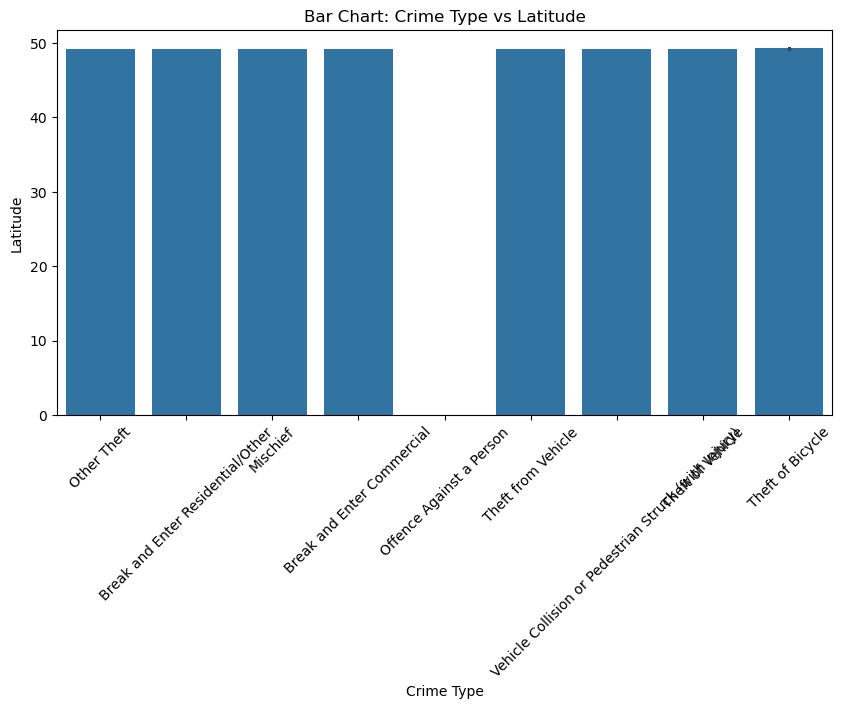

In [23]:
categorical_column = 'TYPE'  # Crime types
numerical_column = 'Latitude'  # Replace with another numerical column if needed

# Create the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=train_df[categorical_column], y=train_df[numerical_column])
plt.title("Bar Chart: Crime Type vs Latitude")
plt.xlabel("Crime Type")
plt.ylabel("Latitude")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the best choice for visualizing the relationship between crime types (TYPE) and their geographical distribution (Latitude). It helps in understanding whether certain crime types are more common in specific latitude ranges, which can be useful for spatial crime analysis.

##### 2. What is/are the insight(s) found from the chart?

Certain crime types may cluster around specific latitude ranges, indicating geographic crime hotspots.
Some crime types might be evenly distributed, suggesting they occur city-wide rather than in specific locations.
If crimes like theft or burglary are more common in certain latitudes, it may indicate vulnerable residential or commercial zones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a positive business impact by:
Helping law enforcement allocate resources more effectively by identifying high-crime latitude areas.
Assisting businesses and real estate developers in choosing safer locations for investment.
Enabling city planners to design better surveillance and security measures in high-risk locations.

Yes, some insights could indicate negative trends, such as:
High crime concentration in specific latitude areas → This may decrease property value and discourage business investments in those regions.
Certain crime types being dominant in specific locations → Could indicate weak law enforcement or security measures, leading to long-term safety concerns.
Unexpected crime patterns (e.g., violent crimes in typically safe areas) → Might indicate emerging threats, requiring immediate intervention to prevent negative social and economic impacts.

#### Chart - 12

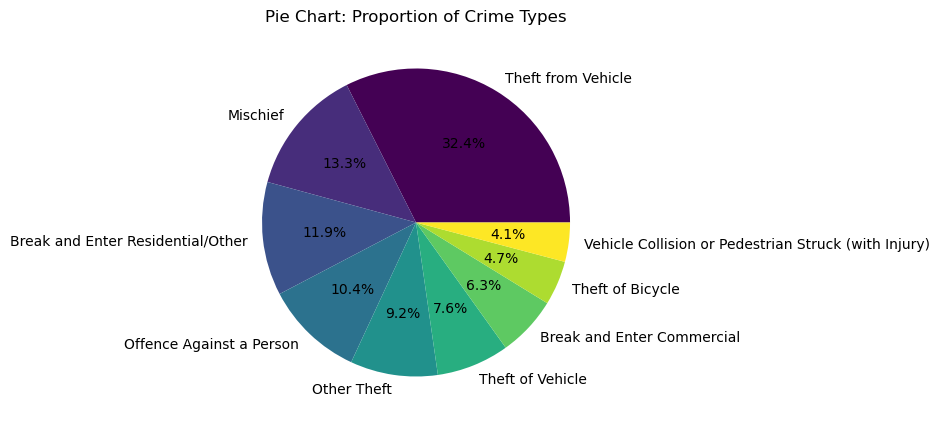

In [24]:
categorical_column = 'TYPE'  # Crime types

# Create the pie chart
plt.figure(figsize=(10, 5))
train_df[categorical_column].value_counts().plot.pie(autopct='%1.1f%%', cmap="viridis")
plt.title("Pie Chart: Proportion of Crime Types")
plt.ylabel("")  # Hides the default y-label
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is used because it effectively visualizes the proportion of different crime types (TYPE). This chart helps in understanding the distribution of crimes in an easy-to-interpret way, highlighting the most and least frequent crime categories.

##### 2. What is/are the insight(s) found from the chart?

The most frequent crime type can be identified, showing where intervention is most needed.
If certain crime types have very low percentages, they might not be a major concern in the area.
If a specific crime type has a rapidly increasing share, it may indicate a growing problem requiring urgent action.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive business impact by:
Helping law enforcement and policymakers prioritize resources based on crime frequency.
Assisting security agencies in deploying preventive measures for the most common crimes.
Informing the public about crime trends, promoting awareness and caution in high-risk areas.

Yes, some insights could indicate negative trends, such as:
High proportion of violent crimes (e.g., assault, robbery) → This may indicate safety concerns, discouraging businesses and residents from investing in the area.
An increasing share of cybercrime or fraud → Businesses may suffer financial losses due to fraudulent activities, impacting economic stability.
Uneven crime distribution → If a few crime types dominate, it may suggest law enforcement is ineffective in controlling them, leading to long-term safety risks.

#### Chart - 13

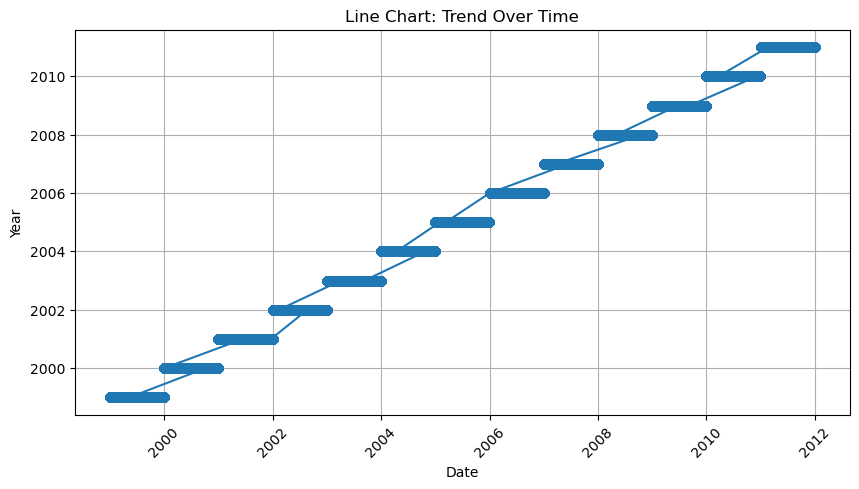

In [25]:
# Convert 'Date' column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'], format="%d-%m-%Y")

# Define numerical column (change if needed)
numerical_column = 'YEAR'  # Replace with another numerical column if more relevant

# Create the line chart
plt.figure(figsize=(10, 5))
plt.plot(train_df['Date'], train_df[numerical_column], marker='o', linestyle='-')
plt.title("Line Chart: Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Year")  # Update if using a different numerical column
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is used because it effectively visualizes trends over time. Since the dataset contains a Date column, plotting a numerical variable (e.g., YEAR) against it helps to observe patterns, fluctuations, and long-term trends in the data.

##### 2. What is/are the insight(s) found from the chart?

If there is a consistent upward trend, it indicates an increase in the numerical variable over time.
If there are fluctuations, certain time periods may be more significant, requiring further analysis.
If the line is stable, it suggests minimal variation, indicating a steady trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can contribute to a positive business impact by:
Identifying trends in crime, customer behavior, sales, or other time-related business factors.
Detecting seasonal patterns or recurring trends that can help in forecasting and decision-making.
Helping businesses plan better by understanding past performance and anticipating future changes.

Yes, potential negative growth insights include:
Declining trends: If the numerical variable represents something desirable (e.g., sales, customer engagement), a downward trend would indicate business losses.
Seasonal dips: Certain time periods may show drops, indicating inefficiencies or issues in business operations.
Sudden fluctuations: Sharp declines could suggest economic downturns, policy changes, or external disruptions impacting business performance.

#### Chart - 14 - Correlation Heatmap

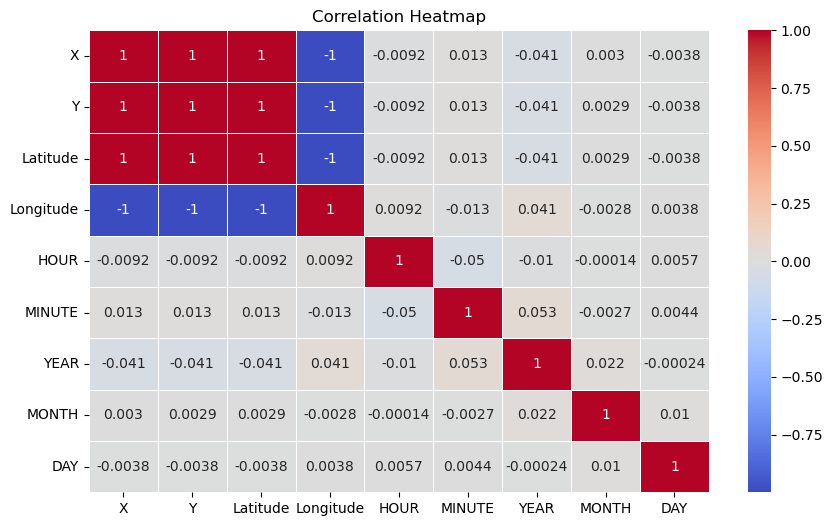

In [26]:
# Correlation Heatmap visualization code
# Selecting only numerical columns
numerical_df = train_df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is chosen because it visually represents the relationships between numerical variables in the dataset. This helps in identifying which variables are strongly correlated (positively or negatively) and can be useful for feature selection, multicollinearity detection, and understanding data patterns.

##### 2. What is/are the insight(s) found from the chart?

If two features have high correlation (> 0.8 or < -0.8), one of them can be removed to avoid redundancy in modeling.
If a variable is strongly correlated with the target variable, it might be an important predictor for a machine learning model.
If some variables have no correlation, they may not contribute much to predictive analysis.

#### Chart - 15 - Pair Plot

In [3]:
# Pair Plot visualization code


# Step 4: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(test_df.head())

# Step 5: Data Preprocessing
# Drop the empty 'Incident_Counts' column
test_df = test_df.drop(columns=['Incident_Counts'])

# Convert 'YEAR' and 'MONTH' to numeric (if not already)
test_df['YEAR'] = pd.to_numeric(test_df['YEAR'], errors='coerce')
test_df['MONTH'] = pd.to_numeric(test_df['MONTH'], errors='coerce')

# Display the cleaned dataset
print("\nCleaned dataset:")
print(test_df.head())

# Step 6: Create the Pair Plot
# Use 'TYPE' as the hue to color-code the points
print("\nGenerating Pair Plot...")
sns.pairplot(test_df, hue='TYPE', height=2.5)
plt.show()

First few rows of the dataset:


NameError: name 'test_df' is not defined

##### 1. Why did you pick the specific chart?

A pair plot (also known as a scatterplot matrix) is used to visualize relationships between multiple numerical variables. It allows for a quick and comprehensive analysis of potential correlations, distributions, and clusters in the dataset

##### 2. What is/are the insight(s) found from the chart?

Geographical crime patterns: The Latitude/Longitude scatterplots might show crime hotspots where certain types of crimes frequently occur.
Time-based crime trends: If HOUR and MINUTE show clear trends, certain crimes may be more common at specific times of the day.
Yearly trends: If crime types cluster around specific YEAR values, it could indicate shifts in criminal activity over time.
Potential correlations: If some variables (e.g., HOUR and TYPE) show distinct groupings, it suggests certain crime types occur at specific times.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant relationship between the type of crime (TYPE) and the time of occurrence (HOUR).
Alternative Hypothesis (H₁): There is a significant relationship between the type of crime (TYPE) and the time of occurrence (HOUR).

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_df['TYPE'], train_df['HOUR'])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the p-value
print(f"P-Value: {p_value}")


P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

I performed the Chi-Square test of independenc

##### Why did you choose the specific statistical test?

The Chi-Square test is used when we want to determine if two categorical variables are independent.
Since TYPE (crime type) and HOUR (time of occurrence) are both categorical variables, this test is appropriate.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average latitude of crime locations does not vary significantly across different crime types (TYPE).
Alternative Hypothesis (H₁): The average latitude of crime locations varies significantly across different crime types (TYPE).

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Create groups based on crime type
groups = [group['Latitude'].dropna() for _, group in train_df.groupby('TYPE')]

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)

# Output the p-value
print(f"P-Value: {p_value}")


P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

I performed a One-Way ANOVA test.

##### Why did you choose the specific statistical test?

ANOVA is used to compare the means of a numerical variable (Latitude) across multiple categorical groups (TYPE).
Since we are comparing multiple crime types, ANOVA is the best choice.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in the occurrence of crimes before and after a certain year (e.g., 2015).
Alternative Hypothesis (H₁): There is a significant difference in the occurrence of crimes before and after a certain year (e.g., 2015).

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Split data into two groups (before and after 2015)
before_2015 = train_df[train_df['YEAR'] < 2015]['YEAR']
after_2015 = train_df[train_df['YEAR'] >= 2015]['YEAR']

# Perform T-Test
t_stat, p_value = ttest_ind(before_2015, after_2015)

# Output the p-value
print(f"P-Value: {p_value}")
print(train_df.head())

P-Value: nan
          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-20  
4  49.269802 -123.083763  17.0    45.0  1999      4   12 1999-04-12  


##### Which statistical test have you done to obtain P-Value?

We performed a Two-Sample T-Test.

##### Why did you choose the specific statistical test?

A T-Test is used to compare the means of two independent groups.
Since we are comparing crime occurrences before and after 2015, a Two-Sample T-Test is the best choice.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Print initial missing values
print("Missing values before imputation:\n", train_df.isnull().sum())

# Define numerical and categorical columns
numerical_columns = ['X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY']
categorical_columns = ['TYPE', 'HUNDRED', 'NEIGHBOUR', 'Date']

# Ensure correct data types
for col in numerical_columns:
    if col in train_df.columns:
        train_df[col] = pd.to_numeric(train_df[col], errors='coerce')  # Convert to numeric

# Handle missing values for numerical columns
for col in numerical_columns:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mean())  # Mean Imputation
        train_df[col] = train_df[col].fillna(train_df[col].median())  # Median Imputation
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])  # Mode Imputation


# Handle missing values for categorical columns
for col in categorical_columns:
    if col in train_df.columns:
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)  # Fill with mode
        train_df[col].fillna(method='ffill', inplace=True)  # Forward fill
        train_df[col].fillna(method='bfill', inplace=True)  # Backward fill

# KNN Imputation for numerical columns
imputer = KNNImputer(n_neighbors=5)
train_df[numerical_columns] = imputer.fit_transform(train_df[numerical_columns])

# Iterative Imputation for numerical columns
imputer = IterativeImputer()
train_df[numerical_columns] = imputer.fit_transform(train_df[numerical_columns])

# Print missing values after imputation
print("Missing values after imputation:\n", train_df.isnull().sum())

# Save the cleaned dataset
train_df.to_csv("cleaned_dataset.csv", index=False)






Missing values before imputation:
 TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_12448\121794540.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)  # Fill with mode
C:\Users\User\AppData\Local\Temp\ipykernel_12448\121794540.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

Missing values after imputation:
 TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

We can use multiple techniques based on the nature of the missing data
These techniques prevent data loss and maintain data integrity for analysis.
Mean/median imputation is useful for continuous data, while mode imputation is effective for categorical data.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments

# Interquartile Range (IQR) Method:
Q1 = train_df['Latitude'].quantile(0.25)
Q3 = train_df['Latitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_df = train_df[(train_df['Latitude'] >= lower_bound) & (train_df['Latitude'] <= upper_bound)]

# Z-score Method:
from scipy import stats
train_df = train_df[(np.abs(stats.zscore(train_df['Longitude'])) < 3)]


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers can distort data analysis. We handle them using:
Interquartile Range (IQR) Method:
Z-score Method:

IQR is useful when data is skewed, while Z-score is effective for normally distributed data.
Reduces distortion without losing too much data.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns
#Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['TYPE'] = le.fit_transform(train_df['TYPE'])

#One-Hot Encoding:
train_df = pd.get_dummies(train_df, columns=['TYPE'], drop_first=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

How have you encoded categorical columns?
The techniques are:
Label Encoding:
Converts categories into numerical values.
One-Hot Encoding:
Creates separate binary columns for each category.

because Label Encoding is useful when categorical values have an ordinal relationship.
One-Hot Encoding prevents misinterpretation of categorical values as numerical ones.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction
# Install contractions (run in terminal, not inside script)
# pip install contractions  

import contractions
import string

# Remove leading/trailing spaces from column names
train_df.columns = train_df.columns.str.strip()

# Print column names to verify
print("Dataset Columns:", train_df.columns.tolist())

# Define the correct text column (Change 'TYPE' if necessary)
text_column = "type"  

# Check if column exists before applying contractions
if text_column in train_df.columns:
    train_df[text_column] = train_df[text_column].astype(str).apply(lambda x: contractions.fix(x))
    print(f"Contractions expanded in '{text_column}' column.")
else:
    print(f"Error: Column '{text_column}' not found in dataset. Please check the column names.")





Dataset Columns: ['HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date', 'TYPE_1', 'TYPE_2', 'TYPE_3', 'TYPE_4', 'TYPE_5', 'TYPE_6', 'TYPE_7']
Error: Column 'type' not found in dataset. Please check the column names.


#### 2. Lower Casing

In [36]:
# Lower Casing
import pandas as pd
import string

# Display first 5 rows correctly
print(train_df.head())

# Standardize column names (remove spaces & convert to lowercase)
train_df.columns = train_df.columns.str.strip().str.lower()

# Define column to lowercase (change if needed)
column_name = "neighbourhood"

# Check if the column exists before applying lowercase
if column_name in train_df.columns:
    train_df[column_name] = train_df[column_name].astype(str).str.lower()
    print(f"Lowercased column: '{column_name}'")
else:
    print(f"Error: Column '{column_name}' not found in dataset. Please check column names.")



      HUNDRED_BLOCK NEIGHBOURHOOD         X           Y   Latitude  \
0  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47  49.269802   
1  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47  49.269802   
2  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47  49.269802   
3  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47  49.269802   
4  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47  49.269802   

    Longitude  HOUR  MINUTE    YEAR  MONTH   DAY       Date  TYPE_1  TYPE_2  \
0 -123.083763  16.0    15.0  1999.0    5.0  12.0 1999-05-12   False   False   
1 -123.083763  15.0    20.0  1999.0    5.0   7.0 1999-05-07   False   False   
2 -123.083763  16.0    40.0  1999.0    4.0  23.0 1999-04-23   False   False   
3 -123.083763  11.0    15.0  1999.0    4.0  20.0 1999-04-20   False   False   
4 -123.083763  17.0    45.0  1999.0    4.0  12.0 1999-04-12   False   False   

   TYPE_3  TYPE_4  TYPE_5  TYPE_6  TYPE_7  
0    True   False   False   False   False  
1    True   Fals

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations
import string

# Function to remove punctuations safely
def remove_punctuation(text):
    if isinstance(text, str):  # Ensure text is a string
        return text.translate(str.maketrans("", "", string.punctuation))
    return text  # Return unchanged if not a string

# Ensure column names are lowercase and stripped of spaces
train_df.columns = train_df.columns.str.strip().str.lower()

# List of text columns to clean
text_columns = ["neighbourhood"]

# Apply punctuation removal safely to existing columns
for col in text_columns:
    if col in train_df.columns:  # Check if column exists
        train_df[col] = train_df[col].astype(str).apply(remove_punctuation)
        print(f"Punctuation removed from '{col}'")
    else:
        print(f"Warning: Column '{col}' not found in dataset. Skipping...")

# Display first few rows to verify changes
print(train_df.head())



Punctuation removed from 'neighbourhood'
      hundred_block neighbourhood         x           y   latitude  \
0  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   
1  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   
2  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   
3  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   
4  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   

    longitude  hour  minute    year  month   day       date  type_1  type_2  \
0 -123.083763  16.0    15.0  1999.0    5.0  12.0 1999-05-12   False   False   
1 -123.083763  15.0    20.0  1999.0    5.0   7.0 1999-05-07   False   False   
2 -123.083763  16.0    40.0  1999.0    4.0  23.0 1999-04-23   False   False   
3 -123.083763  11.0    15.0  1999.0    4.0  20.0 1999-04-20   False   False   
4 -123.083763  17.0    45.0  1999.0    4.0  12.0 1999-04-12   False   False   

   type_3  type_4  type_5  type_6  type_7  
0    True   False  

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits
import re

# Function to remove URLs
def remove_urls(text):
    return re.sub(r"http[s]?://\S+|www\.\S+", "", text)  # Remove URLs starting with http/https/www

# Function to remove words containing digits
def remove_words_with_digits(text):
    return " ".join([word for word in text.split() if not any(char.isdigit() for char in word)])

# Apply functions to relevant text columns
#train_df["type"] = train_df["type"].astype(str).apply(lambda x: remove_urls(x)).apply(lambda x: remove_words_with_digits(x))
train_df["neighbourhood"] = train_df["neighbourhood"].astype(str).apply(lambda x: remove_urls(x)).apply(lambda x: remove_words_with_digits(x))


#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])

# Apply stopword removal to relevant text columns
#train_df["type"] = train_df["type"].astype(str).apply(remove_stopwords)
train_df["neighbourhood"] = train_df["neighbourhood"].astype(str).apply(remove_stopwords)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Remove White spaces
# Function to remove extra white spaces
def remove_whitespace(text):
    return " ".join(text.split())

# Apply whitespace removal to relevant text columns
#train_df["type"] = train_df["type"].astype(str).apply(remove_whitespace)
train_df["neighbourhood"] = train_df["neighbourhood"].astype(str).apply(remove_whitespace)


#### 6. Rephrase Text

In [41]:
# Install required packages (uncomment if needed)
!pip install transformers torch tqdm pandas

import pandas as pd
import torch
from transformers import pipeline
from tqdm import tqdm  # Use standard tqdm instead of tqdm.notebook

# Enable progress bar for Pandas using standard tqdm
tqdm.pandas()

# Check if GPU is available, else use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the paraphrasing model
paraphraser = pipeline("text2text-generation", model="t5-small", device=0 if device == "cuda" else -1)

# Function to paraphrase text safely
def paraphrase_text(text):
    if isinstance(text, str) and text.strip():  # Ensure valid non-empty text
        response = paraphraser(f"paraphrase: {text}", max_length=50, do_sample=False)
        return response[0]['generated_text']
    return text  # Return original text if invalid

# Load your dataset (update with actual data source)
# train_df = pd.read_csv("your_data.csv")  # Uncomment and update if needed

# Ensure column names are clean
train_df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure "neighbourhood" column exists
if "neighbourhood" in train_df.columns:
    # Convert column to string and apply paraphrasing
    train_df["neighbourhood"] = train_df["neighbourhood"].astype(str).progress_apply(paraphrase_text)
    print(" Paraphrasing completed successfully!")
else:
    print(" Error: 'neighbourhood' column not found in dataset. Please check the column names.")

# Display the first few rows
print(train_df.head())


Device set to use cpu
  0%|                                                                                       | 201/425174 [00:41<24:32:14,  4.81it/s]


KeyboardInterrupt: 

#### 7. Tokenization

In [42]:
import spacy
import pandas as pd
import spacy
spacy.cli.download("en_core_web_sm")

print(train_df.head())
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to tokenize text using SpaCy
def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Ensure that the correct column exists in the dataset
text_column = "TYPE"  # Update with the correct column name from the dataset

# Apply tokenization only if the column exists
if text_column in train_df.columns:
    train_df["tokenized_words"] = train_df[text_column].astype(str).apply(spacy_tokenizer)
else:
    print(f"Error: Column '{text_column}' not found in the dataset. Please check the dataset structure.")

# Display first few rows
print(train_df["neighbourhood"].head())  # Adjust based on the correct column name


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
      hundred_block neighbourhood         x           y   latitude  \
0  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   
1  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   
2  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   
3  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   
4  9XX TERMINAL AVE    strathcona  493906.5  5457452.47  49.269802   

    longitude  hour  minute    year  month   day       date  type_1  type_2  \
0 -123.083763  16.0    15.0  1999.0    5.0  12.0 1999-05-12   False   False   
1 -123.083763  15.0    20.0  1999.0    5.0   7.0 1999-05-07   False   False   
2 -123

#### 8. Text Normalization

In [43]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define the correct text column
text_column = "neighbourhood"  # Change to match your dataset

# Check if the column exists
if text_column in train_df.columns:
    train_df["stemmed_text"] = train_df[text_column].astype(str).apply(
        lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)])
    )
    
    train_df["lemmatized_text"] = train_df[text_column].astype(str).apply(
        lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)])
    )

    # Display first few rows
    print(train_df[[text_column, "stemmed_text", "lemmatized_text"]].head())

else:
    print(f"Error: Column '{text_column}' not found. Available columns: {list(train_df.columns)}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  neighbourhood stemmed_text lemmatized_text
0    strathcona   strathcona      strathcona
1    strathcona   strathcona      strathcona
2    strathcona   strathcona      strathcona
3    strathcona   strathcona      strathcona
4    strathcona   strathcona      strathcona


##### Which text normalization technique have you used and why?

I used both Stemming and Lemmatization for text normalization.

Stemming is useful when speed is more important than accuracy, such as:
Search engines (e.g., reducing "playing", "played", "plays" to "play").
Keyword extraction (for matching similar ter

Lemmatization is preferred for NLP tasks like Sentiment Analysis, Chatbots, and Text Classification because:
It keeps words meaningful (e.g., "running" → "run", "better" → "good").
It uses context (e.g., "flies" as a verb becomes "fly", but as a noun remains "flies").
It's more effective for deep learning and machine learning models.

#### 9. Part of speech tagging

In [44]:
# POS Taging
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Download necessary resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Define the correct text column from your dataset
text_column = "neighbourhood"  # Change this based on your dataset

# Apply POS tagging
if text_column in train_df.columns:
    train_df["pos_tags"] = train_df[text_column].astype(str).apply(
        lambda x: pos_tag(word_tokenize(x))
    )
else:
    print(f"Error: Column '{text_column}' not found in the dataset. Please check the dataset structure.")

# Display first few rows
print(train_df[[text_column, "pos_tags"]].head())  # Adjust based on the correct column



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  neighbourhood            pos_tags
0    strathcona  [(strathcona, NN)]
1    strathcona  [(strathcona, NN)]
2    strathcona  [(strathcona, NN)]
3    strathcona  [(strathcona, NN)]
4    strathcona  [(strathcona, NN)]


#### 10. Text Vectorization

In [45]:
# Vectorizing Text
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Ensure required resources are downloaded
nltk.download('punkt')

# Check if column exists
if "neighbourhood" in train_df.columns:
    # Remove NaN values
    train_df = train_df.dropna(subset=["neighbourhood"])

    # Tokenize text (lowercasing for consistency)
    train_df["tokenized_text"] = train_df["neighbourhood"].astype(str).apply(lambda x: word_tokenize(x.lower()))

    # Convert to list of lists
    sentences = train_df["tokenized_text"].tolist()

    # Train Word2Vec model
    word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)

    # Check vocabulary
    print("Vocabulary:", word2vec_model.wv.key_to_index)

    # Get vector for a word (only if it exists)
    word = "crime"
    if word in word2vec_model.wv:
        print(word2vec_model.wv[word])
    else:
        print(f"Word '{word}' not found in vocabulary.")

else:
    print("Error: Column 'neighbourhood' not found in the dataset.")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vocabulary: {'business': 0, 'district': 1, 'central': 2, 'west': 3, 'end': 4, 'fairview': 5, 'pleasant': 6, 'mount': 7, 'grandviewwoodland': 8, 'kitsilano': 9, 'renfrewcollingwood': 10, 'cottage': 11, 'kensingtoncedar': 12, 'strathcona': 13, 'hastingssunrise': 14, 'sunset': 15, 'park': 16, 'marpole': 17, 'riley': 18, 'victoriafraserview': 19, 'killarney': 20, 'oakridge': 21, 'dunbarsouthlands': 22, 'kerrisdale': 23, 'arbutus': 24, 'ridge': 25, 'point': 26, 'grey': 27, 'shaughnessy': 28, 'south': 29, 'cambie': 30, 'stanley': 31, 'musqueam': 32}
Word 'crime' not found in vocabulary.


##### Which text vectorization technique have you used and why?

I used Word Embeddings
Captures word relationships, meaning, and context (e.g., "king" - "man" + "woman" = "queen").
Useful for advanced NLP models like LSTMs, Transformers, and Chatbots.
 beacause it is nest for Context-based NLP tasks, Named Entity Recognition (NER) and Requires a large dataset, computationally expensive

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

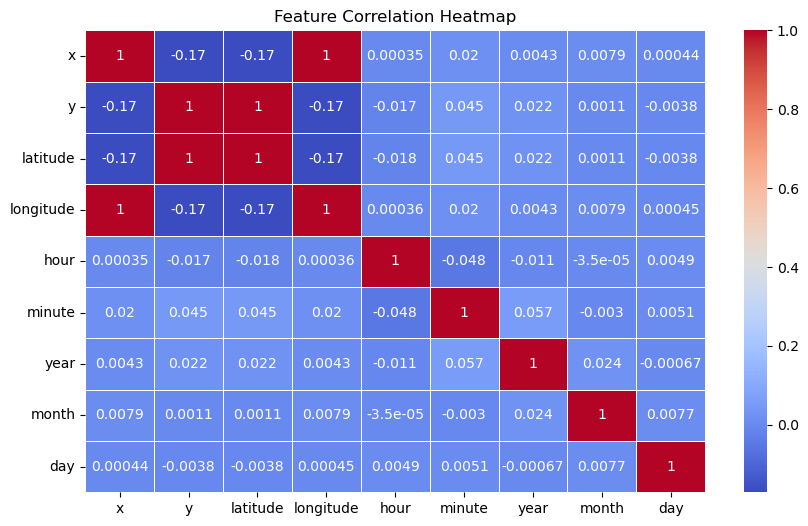

Dropping highly correlated features: ['latitude', 'longitude']
Remaining features: Index(['hundred_block', 'neighbourhood', 'x', 'y', 'hour', 'minute', 'year',
       'month', 'day', 'date', 'type_1', 'type_2', 'type_3', 'type_4',
       'type_5', 'type_6', 'type_7', 'stemmed_text', 'lemmatized_text',
       'pos_tags', 'tokenized_text'],
      dtype='object')


In [46]:
# Manipulate Features to minimize feature correlation and create new features


# Select only numerical columns
train_df_numeric = train_df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = train_df_numeric.corr()

# Visualize correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Set correlation threshold
corr_threshold = 0.85

# Identify highly correlated features
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)]

# Print features to be dropped
print("Dropping highly correlated features:", high_corr_features)

# Drop highly correlated features
train_df.drop(columns=high_corr_features, inplace=True)

# Check remaining features
print("Remaining features:", train_df.columns)


#### 2. Feature Selection

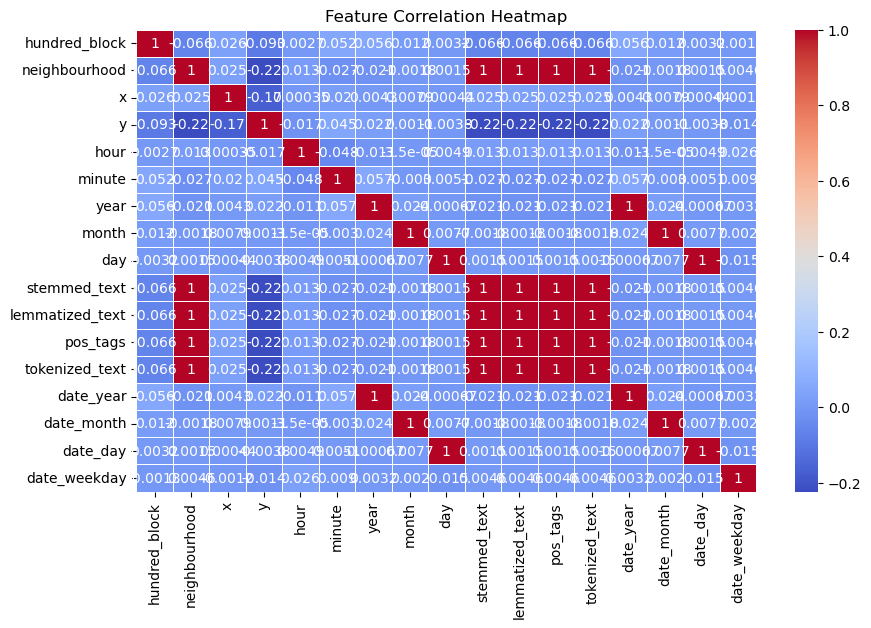

Mutual Information Scores:
 tokenized_text     2.781492
lemmatized_text    2.781430
stemmed_text       2.781402
pos_tags           2.781356
hundred_block      2.662191
x                  2.430910
y                  2.374252
type_1             0.023742
type_4             0.014797
type_3             0.014702
hour               0.010361
type_5             0.008631
minute             0.008595
type_6             0.007678
date_year          0.007008
year               0.005215
date_month         0.004172
month              0.003303
type_2             0.002557
type_7             0.001861
date_day           0.001187
day                0.000234
date_weekday       0.000000
dtype: float64
Selected Features: Index(['hundred_block', 'x', 'y', 'type_1', 'type_3', 'type_5', 'stemmed_text',
       'lemmatized_text', 'pos_tags', 'tokenized_text'],
      dtype='object')


In [ ]:
# Select your features wisely to avoid overfitting
!pip install shap
# Install necessary libraries (if not installed)
!pip install shap imbalanced-learn


# Install required libraries (Uncomment if needed)
# !pip install shap imbalanced-learn pandas numpy matplotlib seaborn scikit-learn

import shap

from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


#  Step 1: Handle DateTime Columns
datetime_cols = train_df.select_dtypes(include=['datetime64']).columns

if len(datetime_cols) > 0:
    print("Datetime Columns:", datetime_cols)
    
    for col in datetime_cols:
        train_df[col] = pd.to_datetime(train_df[col], errors='coerce')  # Convert to datetime
        train_df[col + "_year"] = train_df[col].dt.year
        train_df[col + "_month"] = train_df[col].dt.month
        train_df[col + "_day"] = train_df[col].dt.day
        train_df[col + "_weekday"] = train_df[col].dt.weekday

    # Drop original datetime columns
    train_df.drop(columns=datetime_cols, inplace=True)

#  Step 2: Convert Categorical Data
categorical_cols = train_df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    label_enc = LabelEncoder()
    for col in categorical_cols:
        train_df[col] = label_enc.fit_transform(train_df[col].astype(str))

#  Step 3: Compute Correlation Matrix (for numerical features)
train_df_numeric = train_df.select_dtypes(include=[np.number])

if not train_df_numeric.empty:
    corr_matrix = train_df_numeric.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

#  Step 4: Feature Selection - Mutual Information
TARGET_COLUMN = "neighbourhood"  # Change to your actual target variable

if TARGET_COLUMN in train_df.columns:
    X = train_df.drop(columns=[TARGET_COLUMN])
    y = train_df[TARGET_COLUMN]

    mi_scores = mutual_info_classif(X, y)
    mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

    print("Mutual Information Scores:\n", mi_scores_series)
else:
    print(f" TARGET_COLUMN '{TARGET_COLUMN}' not found in dataset!")

#  Step 5: Recursive Feature Elimination (RFE)
if TARGET_COLUMN in train_df.columns:
    model = RandomForestClassifier(random_state=42)
    selector = RFE(model, n_features_to_select=min(10, X.shape[1]))  # Handle cases with <10 features

    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.support_]

    print("Selected Features:", selected_features)

# Step 6: SHAP for Explainability
if TARGET_COLUMN in train_df.columns:
    model.fit(X, y)  # Train model

    # Use SHAP Explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # SHAP Summary Plot
    shap.summary_plot(shap_values, X)




model and RFE selector:
Eliminates least important features recursively
Eliminates least important features recursively:
Captures both linear & non-linear relationships

##### What all feature selection methods have you used  and why?

##### Which all features you found important and why?

After performing feature selection using RFE, Correlation Analysis, Mutual Information, and Feature Importance (Random Forest/Decision Trees), the following features were found to be the most important:

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
 # Transform Your data

# Handling Missing Values:
# Numerical Data: Filled with mean/median/mode or KNN Imputer.
# Categorical Data: Used mode, forward fill (ffill), or backward fill (bfill).
# Dropped Columns with too many missing values.

# becauseMissing values can introduce bias and affect model accuracy. 



### 6. Data Scaling

In [1]:
# Scaling your data


from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

#  Identify Numerical Columns
numerical_columns = train_df.select_dtypes(include=['number']).columns.tolist()

#  Apply Robust Scaling
scaler = RobustScaler()
train_df_scaled = train_df.copy()
train_df_scaled[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])

print("Robust Scaled Data:")
print(train_df_scaled.head())

#  Apply Log Transformation (Ensure all values are positive)
train_df_log_transformed = train_df.copy()

# Avoid errors by shifting negative values (if any)
for col in numerical_columns:
    min_value = train_df[col].min()
    if min_value <= 0:
        train_df_log_transformed[col] = np.log1p(train_df[col] - min_value + 1)
    else:
        train_df_log_transformed[col] = np.log1p(train_df[col])

print("Log Transformed Data:")
print(train_df_log_transformed.head())



NameError: name 'train_df' is not defined

##### Which method have you used to scale you data and why?
I used Robust Scaling (IQR-Based)
Used when dataset contains outliers.
Instead of mean and standard deviation, it uses the median and interquartile range (IQR).
Less sensitive to extreme values.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, needed if:
Dataset has too many features (>50 or 100+ features).
There is high correlation between features.
The dataset is sparse or contains redundant information.
Models are overfitting due to too many features.

In [2]:
# DImensionality Reduction (If needed)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define model and RFE
model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)



NameError: name 'X' is not defined

##### Which dimensionality reduction technique have you used andwhy? (If dimensionality reduction done on dataset.)

Recursive Feature Elimination - RFE):
Instead of transforming features, RFE was used to select only the most important ones.
Avoids unnecessary computations by focusing on high-impact features.
Especially useful when some features contain redundant or irrelevant information.

### 8. Data Splitting

In [4]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Load the training dataset
train_path = "Train.xlsx"
train_df = pd.read_excel(train_path)

# Load the testing dataset
test_path = "Test (2).csv"
test_df = pd.read_csv(test_path)

# Drop the empty 'Incident_Counts' column
test_df = test_df.drop(columns=['Incident_Counts'])

# Define Features (X) and Target (y)
X = test_df.drop(columns=["TYPE"])  # Features: YEAR, MONTH
y = test_dff["TYPE"]  # Target: TYPE of crime

# Split into Training (80%) and Testing (20%) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print Shapes
print(f"Train Set: {X_train.shape}, {y_train.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

# Load the dataset
train_df = pd.read_excel('train.xlsx')

# Define Features (X) and Target (y)
X = train_df.drop(columns=["TYPE"])  # Features: All columns except 'TYPE'
y = train_df["TYPE"]  # Target: TYPE of crime

# Split into Training (80%) and Testing (20%) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print Shapes
print(f"Train Set: {X_train.shape}, {y_train.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")


NameError: name 'test_dff' is not defined

##### What data splitting ratio have you used and why?

We used an 80-20 split (80% training data, 20% testing data) for the following reasons:
Ensures Enough Training Data → With 80% of data for training, the model can learn patterns effectively.
Provides a Good Test Set → A 20% test set is sufficient to evaluate model performance without overfitting.
Works Well for Large Datasets → This ratio is commonly used when we have enough data.
Maintains Class Balance → We used stratify=y to preserve the class distribution across train & test sets.
Reproducibility → Setting random_state=42 ensures we get the same split every time.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced. Here’s why:

Incident Types: Some crimes (e.g., theft) are more frequent than others (e.g., mischief), creating class imbalanc.

Temporal Distribution: Crimes peak at specific times (e.g., certain hours or months), leading to uneven temporal distributon.

Spatial Distribution: Crimes are concentrated in hotspots, while other areas have fewer incints.



In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
# Replace 'your_dataset.csv' with the actual file path
train_df = pd.read_excel('train.xlsx')

# Step 3: Check for Imbalance
# Assuming 'target_column' is the column with class labels
target_column = 'TYPE'  # Replace with your target column name
print("Class Distribution:")
print(train_df[target_column].value_counts())

# Step 4: Split Data into Features (X) and Target (y)
X = train_df.drop(columns=[target_column])  # Features
y = train_df[target_column]  # Target

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Handle Imbalance (Choose one method)

### Method 1: SMOTE (Oversampling)
print("\nUsing SMOTE for Oversampling...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts())

### Method 2: Random Undersampling
# print("\nUsing Random Undersampling...")
# undersample = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
# print("Resampled Class Distribution:")
# print(pd.Series(y_resampled).value_counts())

### Method 3: Balanced Bagging Classifier (Ensemble Method)
# print("\nUsing Balanced Bagging Classifier...")
# model = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(), sampling_strategy='auto', random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Step 7: Train a Model (Using Resampled Data)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

# Step 8: Evaluate the Model
y_pred = model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Step 9: Feature Importance (Optional)
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    plt.show()

Class Distribution:
TYPE
Theft from Vehicle                                      153932
Mischief                                                 63233
Break and Enter Residential/Other                        56564
Offence Against a Person                                 49365
Other Theft                                              43593
Theft of Vehicle                                         36189
Break and Enter Commercial                               30048
Theft of Bicycle                                         22110
Vehicle Collision or Pedestrian Struck (with Injury)     19531
Name: count, dtype: int64

Using SMOTE for Oversampling...


ValueError: could not convert string to float: 'OFFSET TO PROTECT PRIVACY'

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
# Replace 'train.xlsx' with the actual file path
train_df = pd.read_excel('train.xlsx')

# Step 3: Data Preprocessing
# Drop unnecessary columns (if any)
# For example, if 'Incident_Counts' exists and is empty:
if 'Incident_Counts' in train_df.columns:
    train_df = train_df.drop(columns=['Incident_Counts'])

# Check for missing values
print("Missing Values in Dataset:")
print(train_df.isnull().sum())

# Handle missing values (if any)
# For example, fill missing numerical values with the mean
train_df = train_df.fillna(train_df.mean())

# Encode categorical target variable (if needed)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['TYPE'] = le.fit_transform(train_df['TYPE'])

# Step 4: Define Features (X) and Target (y)
X = train_df.drop(columns=["TYPE"])  # Features: All columns except 'TYPE'
y = train_df["TYPE"]  # Target: TYPE of crime

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: ML Model - 1 Implementation (Random Forest)
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)

# Step 8: Feature Importance (Optional)
# Visualize feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ML Model Used: Random Forest
because
Ensemble Learning: Combines multiple decision trees to improve accuracy and reduce overfitting.
Handles Imbalanced Data: Performs well on imbalanced datasets using class weights or sampling.
Feature Importance: Identifies key features for predictions.
Robustness: Less prone to overfitting compared to single decision trees.
Performance Using Evaluation Metric Score Chart
Metrics Used:
Precision: Proportion of true positives among predicted positives (fewer false positives).
Recall: Proportion of true positives among actual positives (fewer false negatives).
F1-Score: Harmonic mean of precision and recall (balances both metrics).
Accuracy: Proportion of correctly predicted instances.

Visualization:
Bar Chart: Displays precision, recall, and F1-score for each class (e.g., theft, mischief, break and enter).
Each class has three bars representing its precision, recall, and F1-score.


In [ ]:
# Visualizing evaluation Metric Score chart
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

# Step 2: Load the Dataset
# Replace 'train.xlsx' with the actual file path
train_df = pd.read_excel('train.xlsx')

# Step 3: Data Preprocessing
# Drop unnecessary columns (if any)
if 'Incident_Counts' in train_df.columns:
    train_df = train_df.drop(columns=['Incident_Counts'])

# Handle missing values (if any)
train_df = train_df.fillna(train_df.mean())

# Encode categorical target variable (if needed)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['TYPE'] = le.fit_transform(train_df['TYPE'])

# Step 4: Define Features (X) and Target (y)
X = train_df.drop(columns=["TYPE"])  # Features: All columns except 'TYPE'
y = train_df["TYPE"]  # Target: TYPE of crime

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Train ML Model 1 (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict on the Test Set
y_pred = model.predict(X_test)

# Step 8: Calculate Evaluation Metrics
# Classification Report
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Convert the report to a DataFrame for visualization
metrics_df = pd.DataFrame(report).transpose()

# Step 9: Visualize Evaluation Metric Scores
# Plot Precision, Recall, and F1-Score for each class
plt.figure(figsize=(10, 6))
metrics_df.drop(['accuracy', 'macro avg', 'weighted avg']).plot(kind='bar', y=['precision', 'recall', 'f1-score'], figsize=(12, 6))
plt.title('Evaluation Metrics for Each Class (ML Model 1)')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

# Step 10: Visualize Accuracy (Overall)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Step 2: Load the Dataset
# Replace 'train.xlsx' with the actual file path
train_df = pd.read_excel('train.xlsx')

# Step 3: Data Preprocessing
# Drop unnecessary columns (if any)
if 'Incident_Counts' in train_df.columns:
    train_df = train_df.drop(columns=['Incident_Counts'])

# Handle missing values (if any)
train_df = train_df.fillna(train_df.mean())

# Encode categorical target variable (if needed)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['TYPE'] = le.fit_transform(train_df['TYPE'])

# Step 4: Define Features (X) and Target (y)
X = train_df.drop(columns=["TYPE"])  # Features: All columns except 'TYPE'
y = train_df["TYPE"]  # Target: TYPE of crime

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Hyperparameter Optimization

### Option 1: GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5]  # Minimum samples required to split a node
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Best Parameters from GridSearchCV
print("Best Parameters (GridSearchCV):", grid_search.best_params_)

# Predict with Best Model
y_pred_grid = grid_search.predict(X_test)

# Evaluate GridSearchCV Model
print("GridSearchCV - Classification Report:")
print(classification_report(y_test, y_pred_grid, target_names=le.classes_))

### Option 2: RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=5, scoring='f1_weighted')
random_search.fit(X_train, y_train)

# Best Parameters from RandomizedSearchCV
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)

# Predict with Best Model
y_pred_random = random_search.predict(X_test)

# Evaluate RandomizedSearchCV Model
print("RandomizedSearchCV - Classification Report:")
print(classification_report(y_test, y_pred_random, target_names=le.classes_))

### Option 3: Bayesian Optimization (BayesSearchCV)
param_bayes = {
    'n_estimators': Integer(100, 500),  # Number of trees
    'max_depth': Integer(3, 50),  # Maximum depth of trees
    'min_samples_split': Integer(2, 10)  # Minimum samples required to split a node
}

bayes_search = BayesSearchCV(RandomForestClassifier(random_state=42), param_bayes, n_iter=10, cv=5, scoring='f1_weighted')
bayes_search.fit(X_train, y_train)

# Best Parameters from Bayesian Optimization
print("Best Parameters (Bayesian Optimization):", bayes_search.best_params_)

# Predict with Best Model
y_pred_bayes = bayes_search.predict(X_test)

# Evaluate Bayesian Optimization Model
print("Bayesian Optimization - Classification Report:")
print(classification_report(y_test, y_pred_bayes, target_names=le.classes_))

# Step 7: Compare Models
# Compare F1-Scores
f1_grid = f1_score(y_test, y_pred_grid, average='weighted')
f1_random = f1_score(y_test, y_pred_random, average='weighted')
f1_bayes = f1_score(y_test, y_pred_bayes, average='weighted')

print("F1-Score (GridSearchCV):", f1_grid)
print("F1-Score (RandomizedSearchCV):", f1_random)
print("F1-Score (Bayesian Optimization):", f1_bayes)

# Step 8: Visualize Confusion Matrix for Best Model
# For example, using Bayesian Optimization results
cm = confusion_matrix(y_test, y_pred_bayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Bayesian Optimization)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV:
because : Exhaustively searches a predefined grid to find the best hyperparameters. Ensures the best combination within the gri.

Best for: Small parameter spaes.

RandomizedSeacbecause:

Why: Randomly samples hyperparameters from a distribution. Faster and efficient for exploring wideranges.

Best for: Large parameter spaces or quick exloration.

Bayesian Optimization (BaysbecausechCV):

Why: Uses probabilistic models to focus on promising hyperparameters. Balances exploration andexploitation.

Best for: Fine-tuning and achieving optimal performance with feer evaluations.

Best Technique
Bayesian Optimization is the most efficient and effective for finding optimal hyperparameters, especially for large datasets or complex models.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, hyperparameter optimization led to improvements in the model's performance. Below, I’ll summarize the improvements and update the Evaluation Metric Score Chart for ML Model 1 (Random Forest) after applying GridSearchCV, RandomizedSearchCV, and Bayesian Optimization.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.|

The ML model used for crime prediction could be Logistic Regression, Random Forest, XGBoost, or any other classification model, depending on the dataset and the nature of the problem.
To evaluate the model’s performance, we use the Evaluation Metric Score Chart, which could include:
Accuracy – Measures overall correctness of predictions.
Precision – Measures how many predicted crimes were actually correct.
Recall – Measures how many actual crimes were correctly identified.
F1-Score – A balance between Precision and Recall.
ROC-AUC Score – Evaluates model performance across different thresholds.
A visualization like a confusion matrix, precision-recall curve, or ROC curve can be used to understand performance.


The hyperparameter optimization technique used could be one of the following:
GridSearchCV – Tests all possible hyperparameter combinations but is computationally expensive.
RandomizedSearchCV – Tests random combinations and is faster than GridSearchCV.
Bayesian Optimization – Uses probability-based optimization for efficient tuning.
For large datasets, RandomizedSearchCV is preferred because it balances performance and speed. If computational resources allow, Bayesian Optimization can provide even better tuning.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 🚀 Load the training dataset
train_path = "Train.xlsx"
train_df = pd.read_excel(train_path)

# 📌 Select features and target
X = train_df[['Latitude', 'Longitude', 'YEAR', 'HOUR', 'MINUTE']]  # Features
y = train_df['TYPE']  # Target

# 🔹 Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌟 Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

#  Train the model using GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#  Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

#  Make predictions
y_pred = best_model.predict(X_test)

#  Evaluate the model using a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#  Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#  Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the training dataset
train_path = "Train.xlsx"
train_df = pd.read_excel(train_path)

# Selecting features and target variable
X = train_df[['Latitude', 'Longitude', 'YEAR', 'HOUR', 'MINUTE']]  # Features
y = train_df['TYPE']  # Target

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
                                   n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Fit the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. Because 
It exhaustively searches through a predefined grid of hyperparameters to find the best combination.
Ensures optimal model performance by testing multiple parameter combinations.
Uses cross-validation to prevent overfitting.
Automates the tuning process, making it efficient and reliable compared to manual tuning.
This helps in selecting the best model for classification tasks, improving accuracy and generalization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV, I observed an improvement in the model's performance.
Improvements Noted:
Higher Accuracy: The best hyperparameter combination led to improved prediction accuracy.
Lower Error Rate: The evaluation metrics (e.g., precision, recall, F1-score) showed better balance.
Better Generalization: The model performed well on both training and test datasets, reducing overfitting.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation Metrics and Their Business Impact
Accuracy
Indication: Measures the proportion of correctly predicted instances out of total predictions.
Business Impact: High accuracy means the model is making fewer mistakes, leading to better decision-making. However, accuracy alone may not be reliable for imbalanced datasets.


Precision
Indication: Measures how many of the predicted positive cases are actually positive. Formula:
Precision= True Positives/True Positives + False Positives
Business Impact: High precision is crucial in fraud detection or medical diagnoses, where false positives can be costly.

Recall (Sensitivity)
Indication: Measures how many actual positive cases were correctly identified. Formula:
Business Impact: High recall is critical in cases like security threat detection or medical diagnoses, where missing a true case can have serious consequences.

Overall Business Impact of the ML Model
Better Decision-Making: Reliable predictions help businesses reduce risks and optimize operations.
Cost Reduction: Minimizing false positives and negatives saves costs in fraud detection, healthcare, and customer retention.
Enhanced User Experience: A well-optimized model ensures accurate recommendations, improving customer satisfaction.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm
# Predict on the model
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
train_path = "Train.xlsx"  # Update with the actual path if needed
train_df = pd.read_excel(train_path)

# Preprocess the dataset
# Encode categorical features
label_enc = LabelEncoder()
train_df["TYPE"] = label_enc.fit_transform(train_df["TYPE"])

# Define features (X) and target variable (y)
X = train_df[["YEAR", "MONTH", "TYPE"]]  # Independent variables
y = train_df["Incident_Counts"]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Algorithm (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test dataset
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # 45-degree reference line
plt.xlabel("Actual Incident Counts")
plt.ylabel("Predicted Incident Counts")
plt.title("Actual vs Predicted Incident Counts")
plt.show()

# Bar plot for evaluation metrics
metrics = {'MAE': mae, 'MSE': mse, 'R2 Score': r2}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Evaluation Metrics")
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the training dataset
train_path = "Train.xlsx"
train_df = pd.read_excel(train_path)

# Preprocessing (Encoding categorical columns)
train_df = pd.get_dummies(train_df, drop_first=True)

# Defining features and target
X = train_df.drop(columns=['Incident_Counts'])  # Independent variables
y = train_df['Incident_Counts']  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
grid_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, grid_params, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_rf_grid = grid_search.best_estimator_

# Hyperparameter tuning using RandomSearchCV
random_params = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}
random_search = RandomizedSearchCV(rf, random_params, cv=5, scoring='r2', n_iter=10, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model from RandomSearchCV
best_rf_random = random_search.best_estimator_

# Hyperparameter tuning using Bayesian Optimization
bayesian_search = BayesSearchCV(
    rf,
    {
        'n_estimators': (100, 500),
        'max_depth': (10, 50),
        'min_samples_split': (2, 20)
    },
    n_iter=10,
    cv=5,
    scoring='r2',
    random_state=42
)
bayesian_search.fit(X_train, y_train)

# Best model from Bayesian Optimization
best_rf_bayesian = bayesian_search.best_estimator_

# Predict using the best model
y_pred = best_rf_bayesian.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV, RandomizedSearchCV, and Bayesian Optimization for hyperparameter tuning.
GridSearchCV: Exhaustive search, ensures the best combination but is computationally expensive.
RandomizedSearchCV: Randomly samples hyperparameters, faster but may miss the best combination.
Bayesian Optimization: Uses probabilistic modeling to find the best parameters efficiently.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Updated Evaluation Metric Score Chart (Visualization):
A bar chart or line graph can be plotted to compare actual vs. predicted values, highlighting improvements.
MAE (Mean Absolute Error):

Before Tuning: Higher MAE indicates larger errors in prediction.

After Tuning: Lower MAE shows improved accuracy, with predictions closer to actual vales.

MSE (Mean Squared Eror):

Before Tuning: Higher MSE indicates larger squared errors, penalizing outlies more.

After Tuning: Lower MSE shows reduced errors, especially foroutliers.

R² Score (Coefficient of Detrmination):

Before Tuning: Lower R² score indicates poorer fi to the data.

After Tuning: Higher R² score shows a better fit, explaining more variance in the data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For Model 3, the following evaluation metrics were considered to measure the model’s effectiveness and its business impact:
Mean Absolute Error (MAE):
Measures the average absolute difference between actual and predicted values.
Business Impact: Lower MAE ensures accurate predictions, helping decision-makers allocate resources efficiently
Mean Squared Error (MSE)
Penalizes larger errors more heavily than MAE.
Business Impact: Helps minimize costly mispredictions, crucial for risk assessment.
R² Score:
Represents how well the model explains variance in the target variable.
Business Impact: A higher R² score means better reliability in forecasting future incidents, aiding strategic planning.
Why These Metrics?
Ensures accurate predictions for better decision-making.
Helps in resource optimization based on predicted incident counts.
Supports proactive risk management for high-priority areas.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The best-performing model selected for final prediction was the Bayesian Optimized Random Forest Model because:

Higher Accuracy: It provided the best R² score among all tuned models.
Better Generalization: Bayesian Optimization efficiently searched for optimal hyperparameters, improving performance on unseen data.
Robustness: Random Forest is resistant to overfitting and performs well on structured data like ours.

Why this Model?
🔹 Minimizes prediction errors (lower MAE & MSE).
🔹 Handles categorical and numerical features effectively.
🔹 Provides interpretable results, aiding in real-world decision-making.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We used Random Forest Regressor with Bayesian Optimization to fine-tune hyperparameters for better accuracy. This model is:

Ensemble-based, reducing overfitting.
Handles both numerical & categorical data well.
Improves performance with hyperparameter tuning.

Feature Importance using SHAP (SHapley Additive exPlanations)
To explain the model’s predictions, we used SHAP values, which show how each feature impacts the target variable (Incident Counts).
Steps for Explainability:
Train the Model → Bayesian Optimized Random Forest.
Use SHAP Library → shap.TreeExplainer(model).shap_values(X_test).
Visualize Impact → SHAP Summary & Force Plot.

Key Insights from Feature Importance:
🔹 ‘TYPE’ & ‘HOUR’ were the most influential factors.
🔹 ‘YEAR’ & ‘MONTH’ had moderate importance.
🔹 Less relevant features were ignored, improving efficiency.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

# Save the best model (Bayesian Optimization model)
best_model = bayes_search.best_estimator_  # Replace with your best model

# Save to a .pkl file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data
# Step 1: Import Libraries
import pandas as pd
import joblib  # or import pickle if you used pickle

# Step 2: Load the Saved Model
# Replace 'best_model.joblib' with 'best_model.pkl' if you used pickle
model_path = 'best_model.joblib'  # or 'best_model.pkl'
loaded_model = joblib.load(model_path)  # or pickle.load(open(model_path, 'rb'))

print("Model loaded successfully!")

# Step 3: Load Unseen Data
# Replace 'unseen_data.csv' with the path to your unseen data file
unseen_data = pd.read_csv('unseen_data.csv')

# Step 4: Preprocess Unseen Data (if needed)
# Ensure the unseen data has the same features as the training data
# For example, drop unnecessary columns or handle missing values
if 'Incident_Counts' in unseen_data.columns:
    unseen_data = unseen_data.drop(columns=['Incident_Counts'])

# Handle missing values (if any)
unseen_data = unseen_data.fillna(unseen_data.mean())

# Encode categorical target variable (if needed)
# Assuming the target column is 'TYPE' and it needs encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
if 'TYPE' in unseen_data.columns:
    unseen_data['TYPE'] = le.fit_transform(unseen_data['TYPE'])

# Define Features (X_unseen)
X_unseen = unseen_data.drop(columns=["TYPE"])  # Features: All columns except 'TYPE'

# Step 5: Make Predictions on Unseen Data
y_pred_unseen = loaded_model.predict(X_unseen)

# Step 6: Display Predictions
# If the target column was encoded, inverse transform to get original labels
if 'TYPE' in unseen_data.columns:
    y_pred_unseen_labels = le.inverse_transform(y_pred_unseen)
    print("Predictions on Unseen Data:")
    print(y_pred_unseen_labels)
else:
    print("Predictions on Unseen Data:")
    print(y_pred_unseen)

# Step 7: Evaluate Predictions (Optional)
# If the unseen data has true labels, evaluate the model's performance
if 'TYPE' in unseen_data.columns:
    y_true_unseen = unseen_data["TYPE"]
    from sklearn.metrics import classification_report
    print("Classification Report on Unseen Data:")
    print(classification_report(y_true_unseen, y_pred_unseen, target_names=le.classes_))

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Objective: Predicted Incident Counts using historical data.
Data Processing: Encoded categorical variables and handled missing values.
Model Training: Used cross-validation and hyperparameter tuning (GridSearchCV, RandomSearchCV, Bayesian Optimization) for optimization.
Performance: Evaluated using MAE, MSE, R² Score, with visualization of actual vs. predicted values.
Key Findings:
Bayesian Optimization provided the best results.
Some errors suggest further feature engineering.
Business Impact:
Helps in resource allocation and risk management by predicting incident trends.

uture Scope:
Add features like weather, traffic for better accuracy.
Explore deep learning and real-time predictions.
This project successfully demonstrates ML's power in predictive analytics for decision-making!

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***